# Masterthesis
## Deskriptive Statistik
#### Julian Jetz

## Inhalt:

* [Boxenplots und Histogramme der Schäden (mit Ausreißern)](#ausreißer)


* [Entfernung der Ausreißer](#ausreißer-delete)


* [Häufigkeitsverteilungen](#frequencies)
    * [Zugart](#freq-zugart)
    * [Unfallart](#freq-unfallart)
    * [Streckenart](#freq-streckenart)
    * [Unfallursache Lvl 2](#freq-cause)
        * [Unfallursache Lvl 1 (nach Unfallart aufgeteilt)](#freq-cause_lvl1_lvl2_unfallart)
    * [Unfallsignifikanz](#freq-acctype)
        * [Unfallsignifikanz (nach Unfallursache Lvl 2)](#freq-acctype_cause)
    * [Wetter](#freq-wetter)
    * [Jahreszeit](#freq-jahreszeit)
    * [Jahr](#freq-jahr)
        * [Jahr nach Unfallart](#freq-jahr_unfallart)
    * [Temperatur](#freq-temp)
        * [Unfallursachen nach Temperatur](#freq-temp_cause)
    * [Sichtbarkeit](#freq-vis)
    * [Geschwindigkeitsüberschreitung](#freq-speed)


* [Verteilungstabellen](#tables)
    * [Zugart nach Unfallart](#tables_eqtype_type)
    * [Unfallart nach Zugart](#tables_type_eqtype)
    * [Unfallursache nach Zugart](#tables_zugart_cause)
    * [Unfallursache nach Wetter](#tables_weather_cause)
    * [Unfallursache nach Jahreszeit](#tables_jahreszeit_cause)
    * [Unfallursache nach Temperatur](#tables_cause_temp)
    * [Unfallursache nach Sichtbarkeit](#tables_vis_cause)
    * [Sichtbarkeit nach Unfallursache](#tables_cause_vis)
    * [Geschwindigkeitsüberschreitung nach Unfallart](#tables_speed_acctype)
    * [Geschwindigkeitsüberschreitung nach Streckenart](#tables_speed_typtrk)
    * [Geschwindigkeitsüberschreitung nach Zugart](#tables_speed_eqtype)


* [Boxenplots und Histogramme](#boxenplots)
    * [Infrastrukturschaden](#infrastrukturdmg)
    * [Materialschaden](#EQPDMG)
    * [Streckenschaden](#TRKDMG)
    * [Zuggeschwindigkeit](#zuggeschwindigkeit)
    * [Zuggewicht](#tons)
    * [Zugart](#zugart)
    * [Unfallart](#unfallart)
    * [Streckenart](#typtrk)
    * [Unfallursache Lvl 2](#cause)
    * [Unfallsignifikanz](#unfallsignifikanz)
    * [Wetter](#wetter)
    * [Jahreszeit](#Jahreszeit)
    * [Jahr](#jahr)
    * [Temperatur](#temp)
    * [Sichrbarkeit](#vis)
    * [Geschwindigkeitsüberschreitung](#speed)
    
    
* [Statistik](#common_statistics)


* [Korrelationen](#correlations)


* [Anova Varianz](#ANOVA)
    * [Anova Heatmap](#ANOVA_HEATMAP)

In [1]:
import glob
import pandas as pd
import numpy as np
from scipy import stats
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from pandas.plotting import scatter_matrix
from datetime import date
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
na_values = ['nan', 'N/A', 'NaN', 'NaT']

In [3]:
df = pd.read_csv('resources/multi_train_accident_data.csv', sep=";", na_values=na_values, index_col=False, dtype = {"STATE" : "str", "TYPE" : "str", "TYPEQ" : "str", "TYPTRK" : "str", "WEATHER" : "str", "VISIBLTY" : "str", "TONS" : "float64"})
df.shape[0]

8611

In [4]:
pd.set_option('display.max_colwidth', 500)

In [5]:
a4_dims = (18, 10)
sns.set(style="whitegrid")

### Boxenplots und Histogramme der Schäden (mit Ausreißern) <a class="anchor" id="ausreißer"></a>



#### Boxenplot Infrastrukturschaden

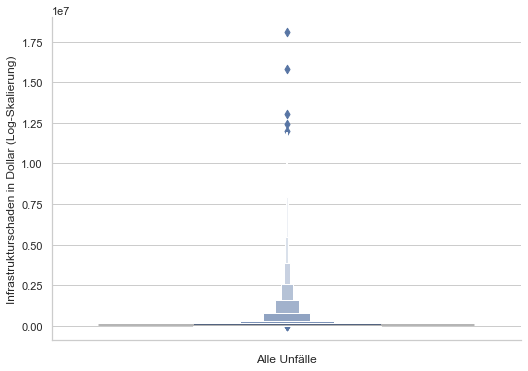

In [6]:
ax = sns.catplot(y='INFRASTRUCTURE_DMG', data=df, kind='boxen', height=5, aspect=1.5)
sns.despine()
#plt.yscale("log")
ax.set_ylabels("Infrastrukturschaden in Dollar (Log-Skalierung)")
ax.set_xlabels("Alle Unfälle")
plt.savefig('Images/Multi_Train/Boxplot_Infrastrukturschaden.png')



#### Histogramm Infrastrukturschaden (ohne Ausreißer)¶

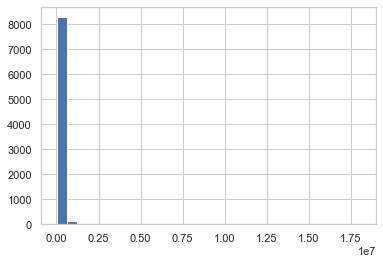

In [7]:
df['INFRASTRUCTURE_DMG'].hist(bins=30)
plt.savefig('Images/Multi_Train/Histogramm_Infrastrukturschaden.png')



#### Boxenplot Materialschaden

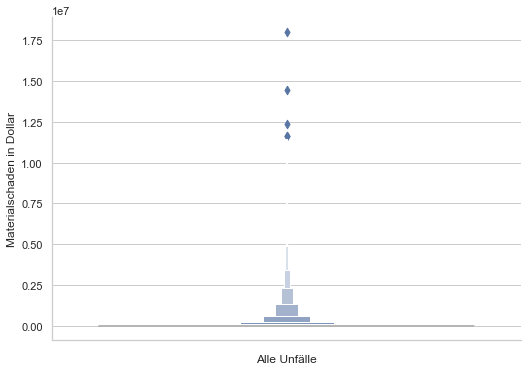

In [8]:
ax = sns.catplot(y='EQPDMG', data=df, kind='boxen', height=5, aspect=1.5)
sns.despine()
ax.set_ylabels("Materialschaden in Dollar")
ax.set_xlabels("Alle Unfälle")
plt.savefig('Images/Multi_Train/Boxplot_Materialschaden.png')



#### Histogramm Materialschaden

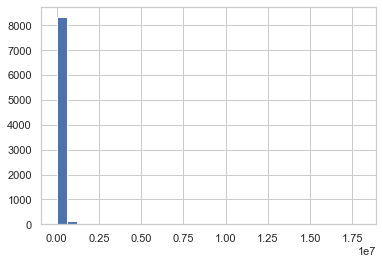

In [9]:
df['EQPDMG'].hist(bins=30)
plt.savefig('Images/Multi_Train/Histogramm_Materialschaden.png')



#### Boxenplot Streckenschaden

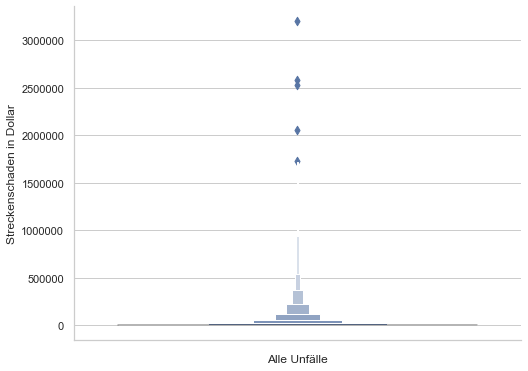

In [10]:
ax = sns.catplot(y='TRKDMG', data=df, kind='boxen', height=5, aspect=1.5)
sns.despine()
ax.set_ylabels("Streckenschaden in Dollar")
ax.set_xlabels("Alle Unfälle")
plt.savefig('Images/Multi_Train/Boxplot_Streckenschaden.png')



#### Histogramm Materialschaden

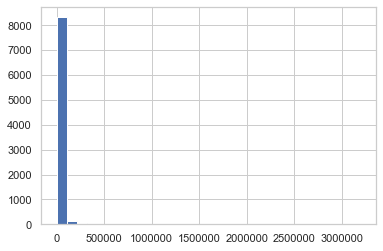

In [11]:
df['TRKDMG'].hist(bins=30)
plt.savefig('Images/Multi_Train/Histogramm_Streckenschaden.png')



#### Entfernung der Ausreißer <a class="anchor" id="ausreißer-delete"></a>

In [12]:
df.shape[0]

8611

In [13]:
df=df.dropna(subset=['INFRASTRUCTURE_DMG', 'YEAR4', 'LOCOMOTIVES1', 'LOADF1', 'LOADP1', 'EMPTYF1', 'EMPTYP1','LOCOMOTIVES2', 'LOADF2', 'EMPTYF2', 'TONS', 'TEMP_CLUSTER', 'SPEED', 'ACCCAUSE_LVL1', 'TYPE', 'EQUIPMENT_TYPE', 'TYPTRK', 'VISIBLTY', 'WEATHER', 'STATE', 'SPD_TOO_HIGH', 'ACCTYPE', 'ACCIDENT_TYPE', 'Jahreszeit'])

In [14]:
df.shape[0]

8601

In [15]:
std_dev = 3.5
df = df[(np.abs(stats.zscore(df[['LOCOMOTIVES1','LOADF1', 'LOADP1', 'EMPTYF1', 'EMPTYP1','LOCOMOTIVES2','LOADF2', 'EMPTYF2', 'INFRASTRUCTURE_DMG']])) < float(std_dev)).all(axis=1)]

In [16]:
df.shape[0]

7920

### Häufigkeiten <a class="anchor" id="frequencies"></a>

In [17]:
def bar_values(ax):
    for p in ax.patches:
        ax.annotate(format(p.get_height(), ',d').replace(",","."), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    sns.despine()
    return ax



#### Häufigkeiten Zugart <a class="anchor" id="freq-zugart"></a>

In [18]:
def redurceEqTypes(cus_df):
    eqtypes = cus_df["EQUIPMENT_TYPE"].value_counts().keys().tolist()
    counts = cus_df["EQUIPMENT_TYPE"].value_counts().tolist()

    for (eqtype, count) in zip(eqtypes, counts):
        if count < 30:
            idxs = cus_df[cus_df["EQUIPMENT_TYPE"] == eqtype].index
            cus_df.drop(idxs, inplace=True)
            
    return cus_df

In [19]:
custom_df = df.copy(deep=True)
custom_df = redurceEqTypes(custom_df)


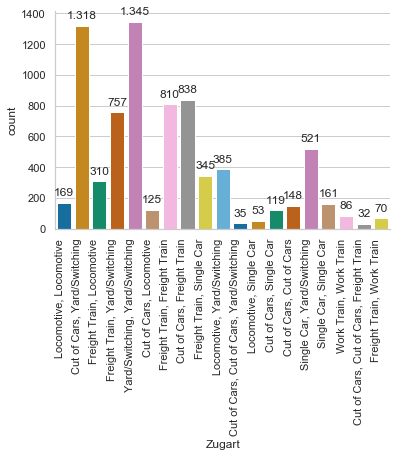

In [20]:
#fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.countplot(x="EQUIPMENT_TYPE", data=custom_df, palette="colorblind")
ax = bar_values(ax)
ax.set_xlabel("Zugart")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, horizontalalignment='right')
plt.savefig('Images/Multi_Train/Count_Zugart.png')



#### Häufigkeiten Unfallart <a class="anchor" id="freq-unfallart"></a>

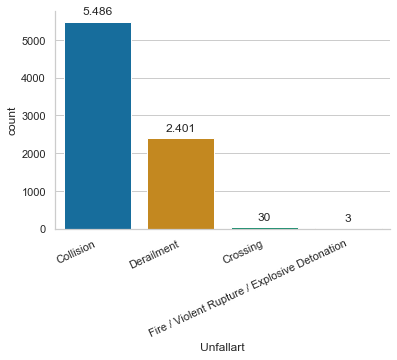

In [21]:
ax = sns.countplot(x="ACCIDENT_TYPE", data=df, palette="colorblind")
ax = bar_values(ax)
ax.set_xlabel("Unfallart")
ax.set_xticklabels(ax.get_xticklabels(),rotation=25, horizontalalignment='right')
plt.savefig('Images/Multi_Train/Count_Unfallart.png')



#### Häufigkeiten Streckenart <a class="anchor" id="freq-streckenart"></a>

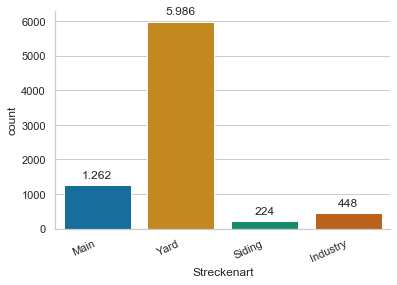

In [22]:
ax = sns.countplot(x="TYPTRK", data=df, palette="colorblind")
ax = bar_values(ax)
ax.set_xlabel("Streckenart")
ax.set_xticklabels(ax.get_xticklabels(),rotation=25, horizontalalignment='right')
plt.savefig('Images/Multi_Train/Count_Streckenart.png')



#### Häufigkeiten Unfallursache <a class="anchor" id="freq-cause"></a>

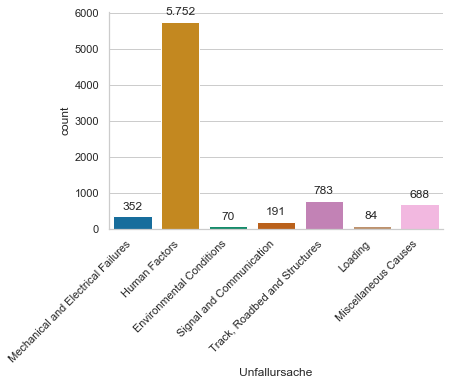

In [23]:
#fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.countplot(x="ACCCAUSE_LVL2", data=df, palette="colorblind")
ax = bar_values(ax)
ax.set_xlabel("Unfallursache")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
plt.savefig('Images/Multi_Train/Count_Unfallursache.png')



#### Häufigkeiten Unfallursache Lvl 1 (eingefärbt nach Unfallursache Lvl2 und gruppiert nach Unfallart) <a class="anchor" id="freq-cause_lvl1_lvl2_unfallart"></a>

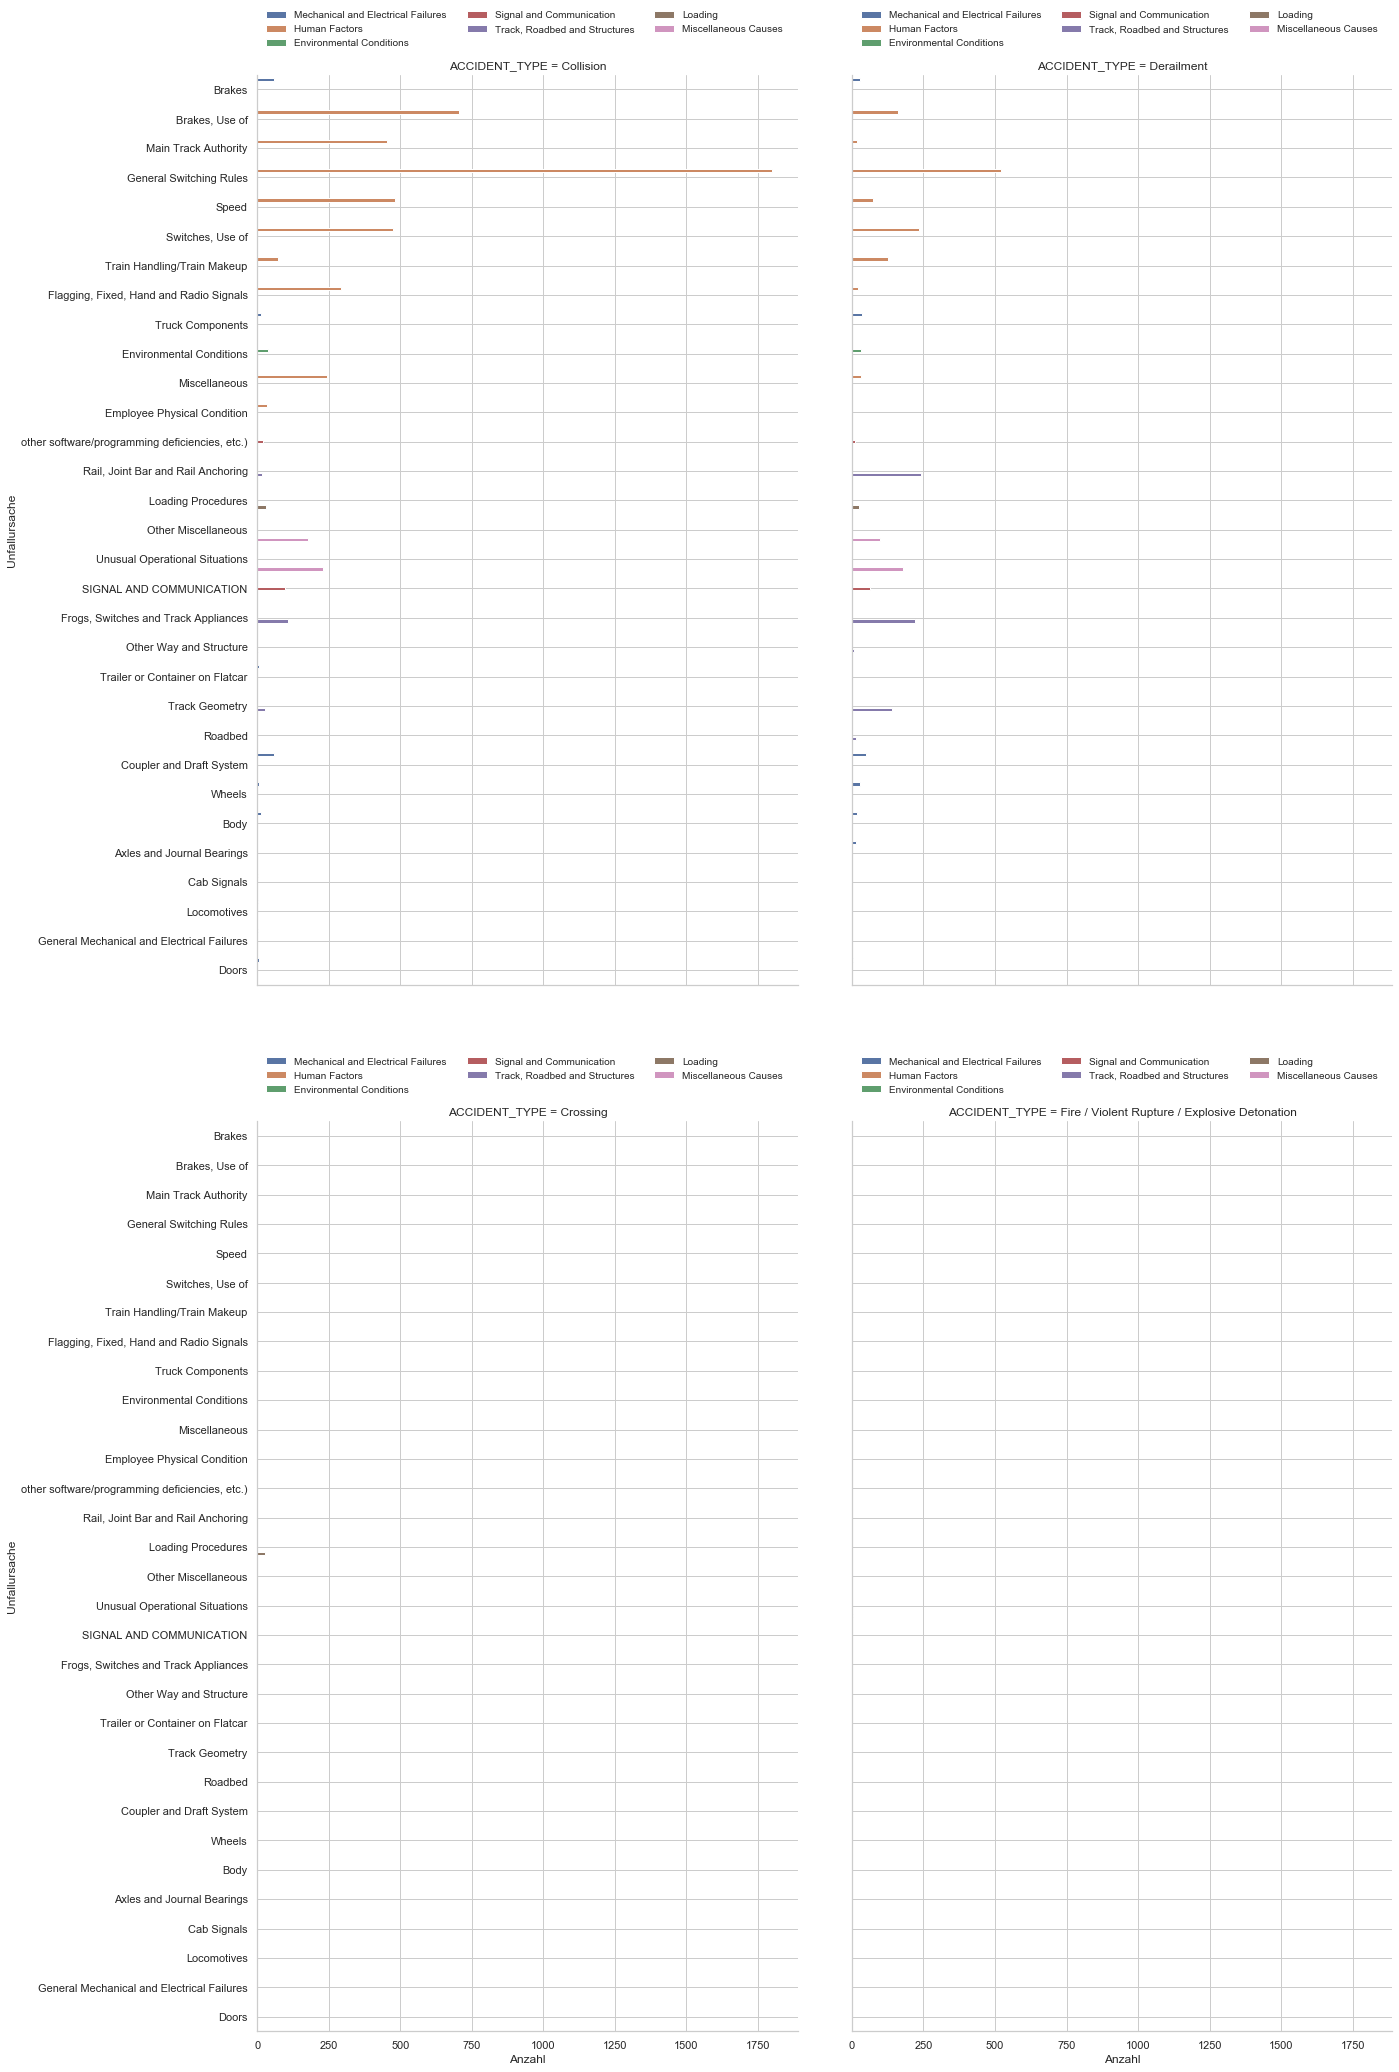

In [24]:
bp = sns.catplot(y="ACCCAUSE_LVL1", hue="ACCCAUSE_LVL2", data=df, kind="count", col="ACCIDENT_TYPE", col_wrap=2, height=14, aspect=0.7, legend=False, legend_out=False)
bp.set_xlabels('Anzahl', fontsize=12)
bp.set_ylabels('Unfallursache', fontsize=12)
for ax in bp.axes:
    ax.legend(bbox_to_anchor=(0, 1.08), loc='upper left', ncol=3, frameon=False, fontsize=10)
    ax.grid(axis='y')
    #plt.setp(ax.get_xticklabels(), visible=True)
    #ax.set_xticks([0,1,2,3,4,5], ax.get_xticklabels())
plt.subplots_adjust(wspace=0.1, hspace=0.15)
plt.savefig('Images/Multi_Train/Count_Unfallursache_Unfallart.png')



#### Häufigkeiten Unfallschwere <a class="anchor" id="freq-acctype"></a>

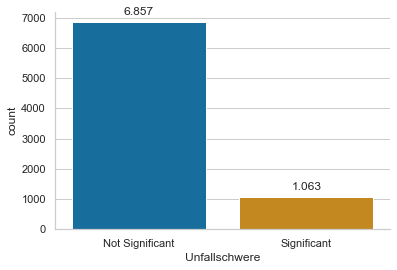

In [25]:
ax = sns.countplot(x="ACCTYPE", data=df, palette="colorblind")
ax = bar_values(ax)
ax.set_xlabel("Unfallschwere")
plt.savefig('Images/Multi_Train/Count_Unfallschwere.png')



#### Häufigkeiten Unfallschwere (nach Zugart)  <a class="anchor" id="freq-acctype_cause"></a>

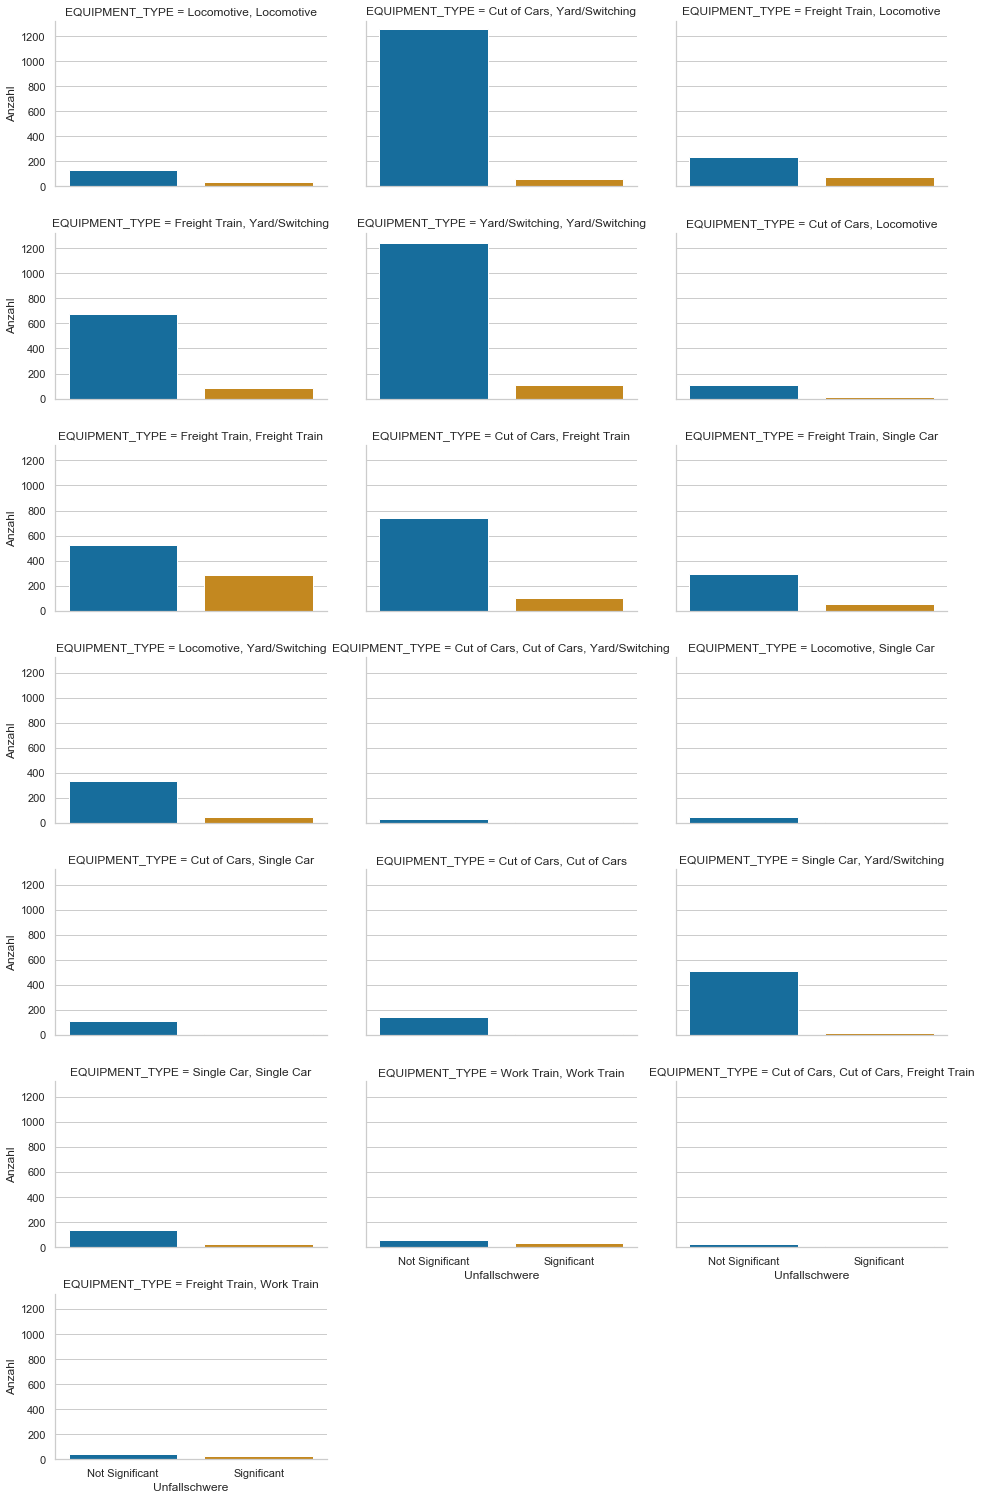

In [26]:
cp = sns.catplot(x="ACCTYPE", data=custom_df, col="EQUIPMENT_TYPE", palette="colorblind", kind="count", col_wrap=3, height=3, aspect=1.5)
cp.set_xlabels('Unfallschwere', fontsize=12)
cp.set_ylabels('Anzahl', fontsize=12)
plt.savefig('Images/Multi_Train/Count_Unfallschwere_Zugart.png')



#### Häufigkeiten Wetter <a class="anchor" id="freq-wetter"></a>

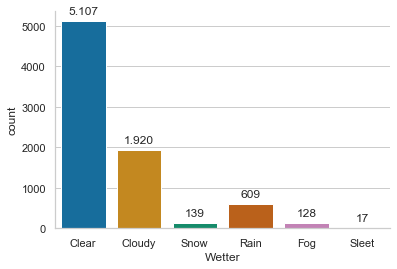

In [27]:
ax = sns.countplot(x="WEATHER", data=df, palette="colorblind")
ax = bar_values(ax)
ax.set_xlabel("Wetter")
plt.savefig('Images/Multi_Train/Count_Wetter.png')



#### Häufigkeiten Jahreszeit <a class="anchor" id="freq-jahreszeit"></a>

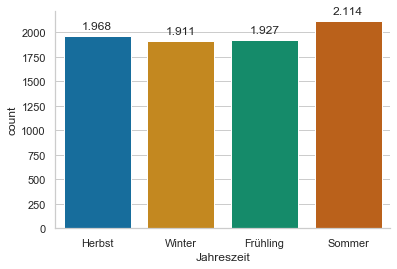

In [28]:
ax = sns.countplot(x="Jahreszeit", data=df, palette="colorblind")
ax = bar_values(ax)
ax.set_xlabel("Jahreszeit")
plt.savefig('Images/Multi_Train/Count_Jahreszeit.png')



#### Häufigkeiten Jahr <a class="anchor" id="freq-jahr"></a>

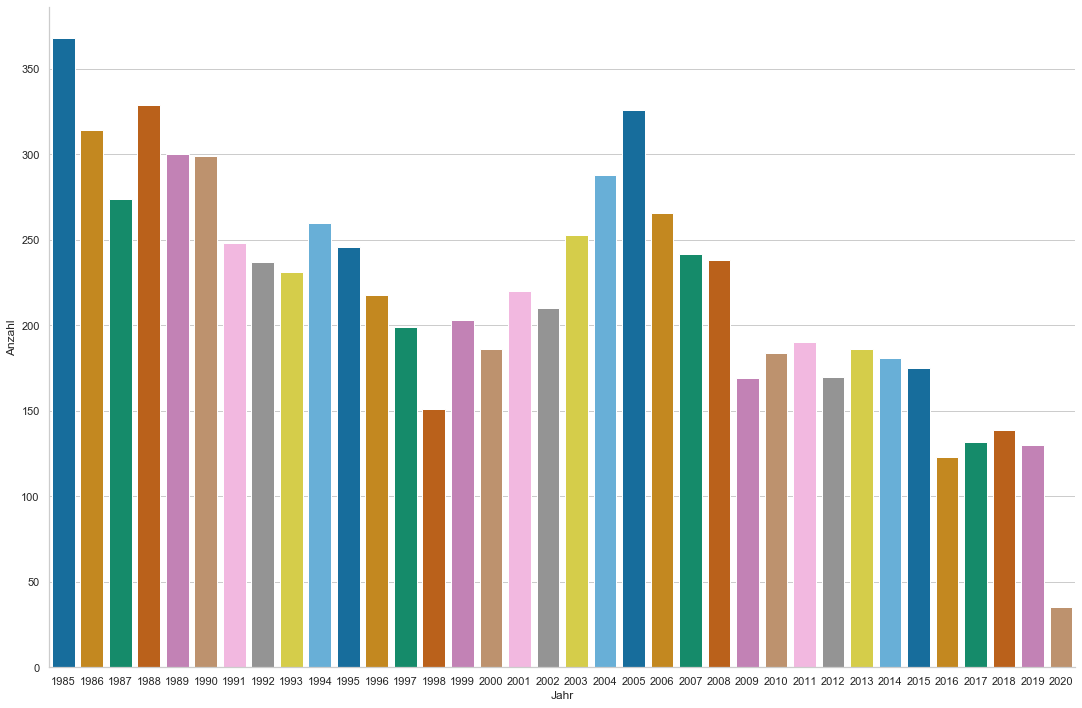

In [29]:
bp = sns.catplot(x="YEAR4", data=df, kind="count", height=10, aspect=1.5, palette="colorblind")
bp.set_xlabels('Jahr', fontsize=12)
bp.set_ylabels('Anzahl', fontsize=12)
plt.savefig('Images/Multi_Train/Count_Jahr.png')



#### Häufigkeiten Jahr (nach Unfallart) <a class="anchor" id="freq-jahr_unfallart"></a>


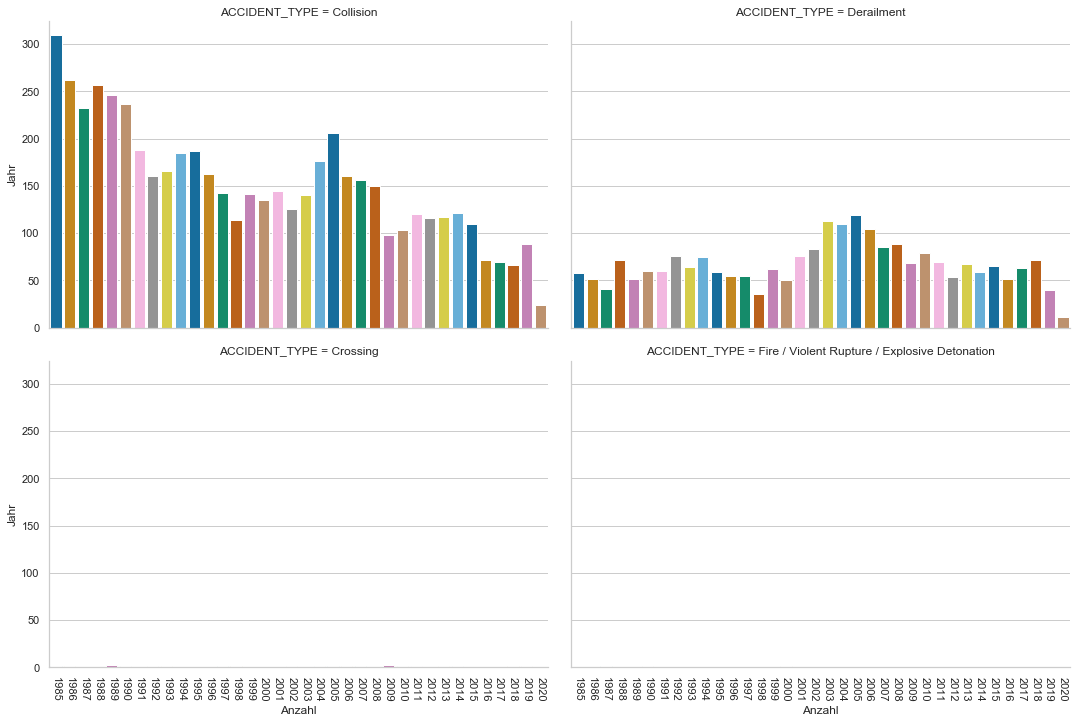

In [30]:
bp = sns.catplot(x="YEAR4", data=df, kind="count", col="ACCIDENT_TYPE", col_wrap=2, height=5, aspect=1.5, palette="colorblind")
bp.set_ylabels('Jahr', fontsize=12)
bp.set_xlabels('Anzahl', fontsize=12)
for x in bp.axes.flat:
    for label in x.get_xticklabels():
        label.set_rotation(-90)
plt.savefig('Images/Multi_Train/Count_Jahr_Unfallart.png')



#### Häufigkeiten Temperatur <a class="anchor" id="freq-temp"></a>

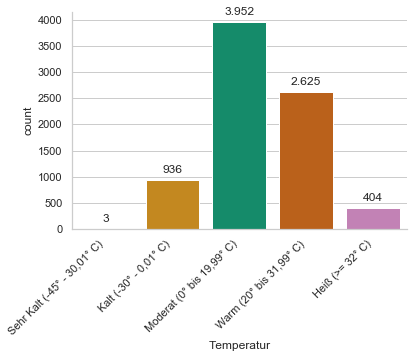

In [31]:
temp_order = ["Sehr Kalt (-45° - 30,01° C)", "Kalt (-30° - 0,01° C)", "Moderat (0° bis 19,99° C)", "Warm (20° bis 31,99° C)", "Heiß (>= 32° C)"]
ax = sns.countplot(x="TEMP_CLUSTER", data=df, palette="colorblind", order=temp_order)
ax = bar_values(ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
ax.set_xlabel("Temperatur")
plt.savefig('Images/Multi_Train/Count_Temperatur.png')



#### Häufigkeiten Temperatur (nach Unfallursache) <a class="anchor" id="freq-temp_cause"></a>

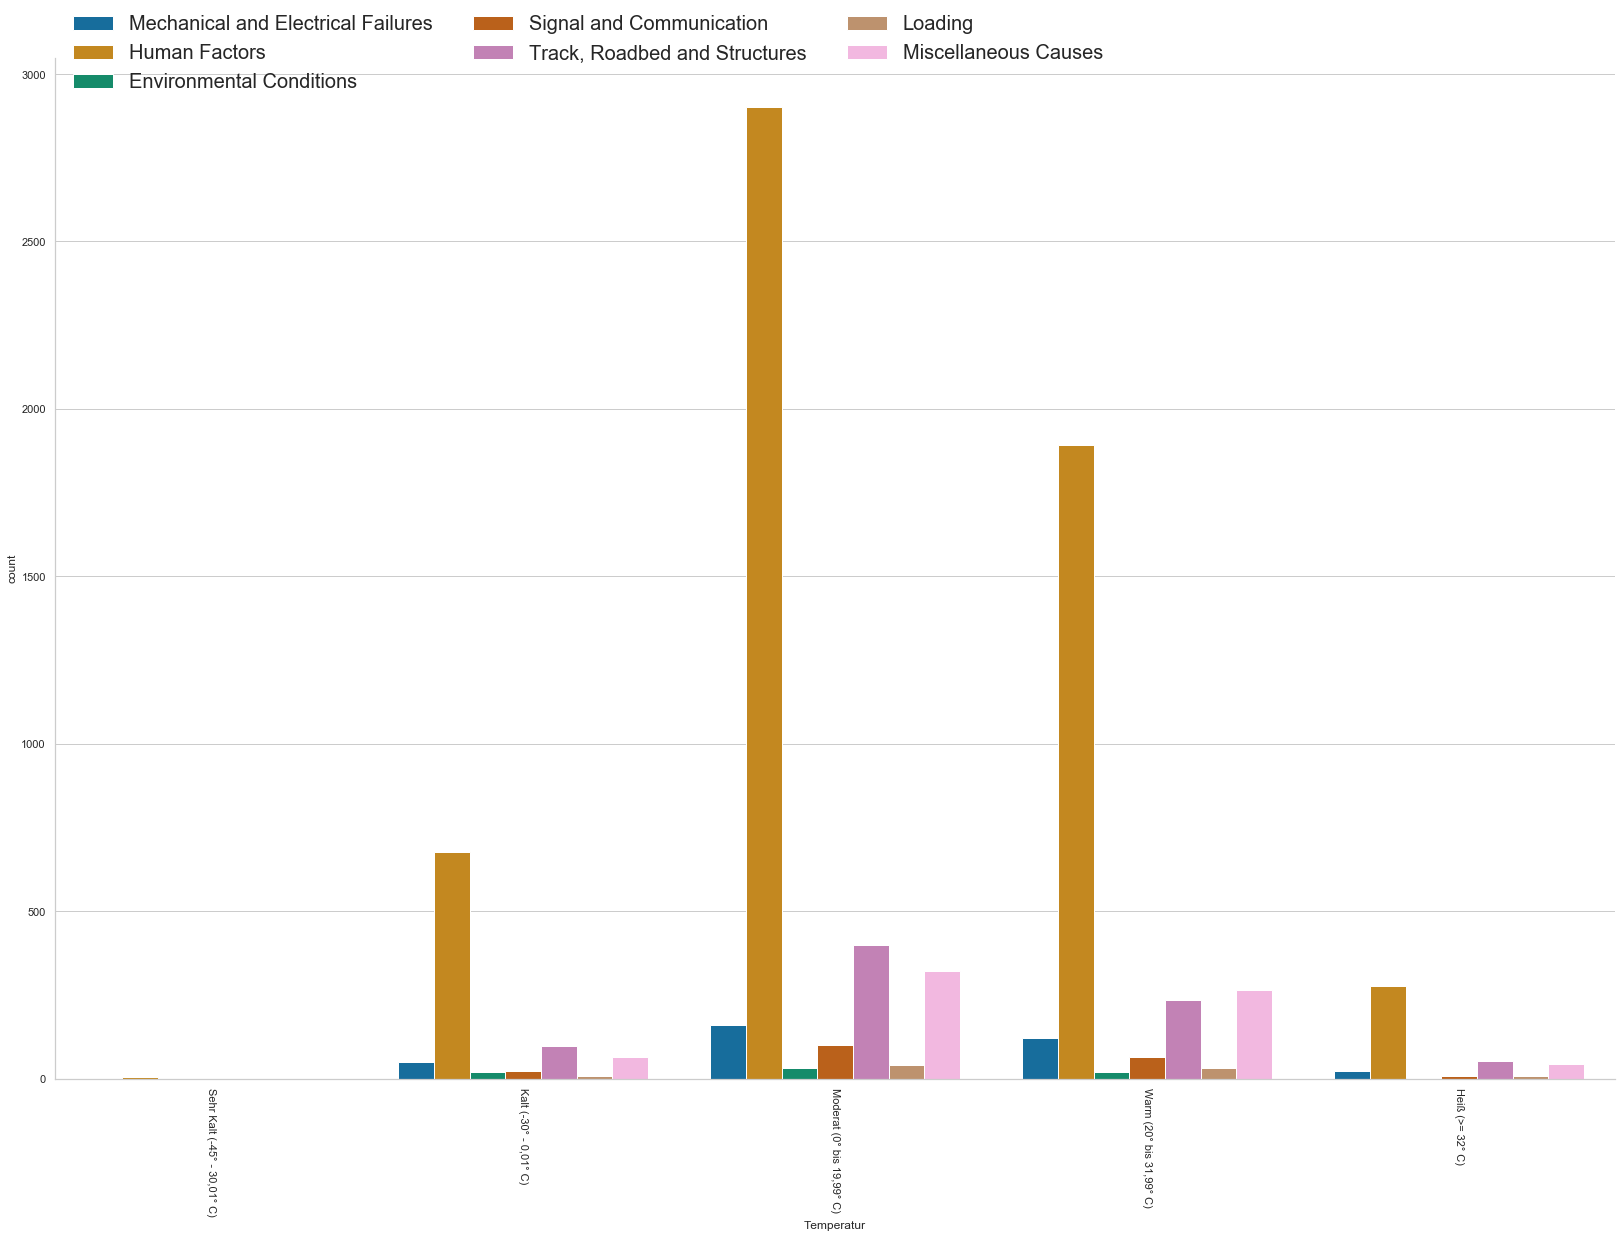

In [32]:
ax = sns.catplot(x="TEMP_CLUSTER", hue="ACCCAUSE_LVL2", kind="count", data=df, palette='colorblind', order=temp_order, legend=False, height=15, aspect=1.5)
for x in ax.axes.flat:
    x.legend(bbox_to_anchor=(0, 1.06), loc='upper left', ncol=3, frameon=False, fontsize=20)
    for label in x.get_xticklabels():
        label.set_rotation(-90)   
ax.set_xlabels("Temperatur")
plt.savefig('Images/Multi_Train/Count_Temperatur_Unfallursache.png')



#### Häufigkeiten Sichtbarkeit <a class="anchor" id="freq-vis"></a>

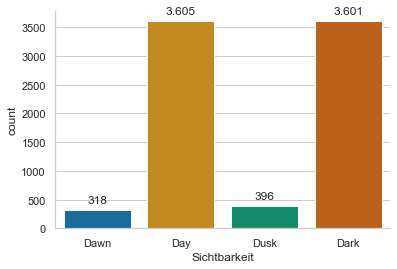

In [33]:
vis_order = ["Dawn", "Day", "Dusk", "Dark"]
ax = sns.countplot(x="VISIBLTY", data=df, palette="colorblind", order=vis_order)
ax = bar_values(ax)
ax.set_xlabel("Sichtbarkeit")
plt.savefig('Images/Multi_Train/Count_Sichtbarkeit.png')



#### Häufigkeiten zu hohe Zuggeschwindigkeit <a class="anchor" id="freq-speed"></a>

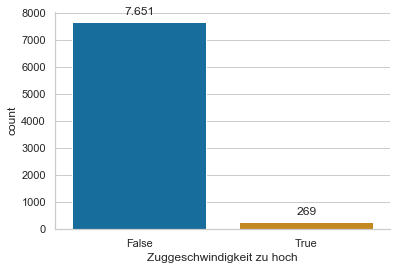

In [34]:
ax = sns.countplot(x="SPD_TOO_HIGH", data=df, palette="colorblind")
ax = bar_values(ax)
ax.set_xlabel("Zuggeschwindigkeit zu hoch")
plt.savefig('Images/Multi_Train/Count_Zug_zu_schnell.png')



### Verteilungstabellen <a class="anchor" id="tables"></a>



#### Verteilungstabelle Zugart nach Unfallart <a class="anchor" id="tables_eqtype_type"></a>

In [35]:
format_dict = {'Commuter Train':'{:.2f}%', 'Cut of Cars': '{:.2f}%', 'Freight Train': '{:.2f}%', 
               'Locomotive': '{:.2f}%', 'Passenger Train': '{:.2f}%', 'Single Car': '{:.2f}%', 'Work Train': '{:.2f}%',
               'Yard/Switching': '{:.2f}%', 'All': '{:.2f}%'}
freq_tab = pd.crosstab(index=custom_df["ACCIDENT_TYPE"],  columns=custom_df["EQUIPMENT_TYPE"], margins=True)
(freq_tab/freq_tab.loc["All"]*100).style.format('{:.2f}%')

EQUIPMENT_TYPE,"Cut of Cars, Cut of Cars","Cut of Cars, Cut of Cars, Freight Train","Cut of Cars, Cut of Cars, Yard/Switching","Cut of Cars, Freight Train","Cut of Cars, Locomotive","Cut of Cars, Single Car","Cut of Cars, Yard/Switching","Freight Train, Freight Train","Freight Train, Locomotive","Freight Train, Single Car","Freight Train, Work Train","Freight Train, Yard/Switching","Locomotive, Locomotive","Locomotive, Single Car","Locomotive, Yard/Switching","Single Car, Single Car","Single Car, Yard/Switching","Work Train, Work Train","Yard/Switching, Yard/Switching",All
ACCIDENT_TYPE,,,,,,,,,,,,,,,,,,,,
Collision,72.30%,34.38%,31.43%,50.84%,83.20%,67.23%,54.48%,69.75%,77.42%,65.22%,87.14%,80.32%,96.45%,90.57%,77.92%,86.96%,58.93%,97.67%,83.12%,69.70%
Crossing,0.00%,0.00%,0.00%,0.60%,0.00%,0.00%,0.00%,1.36%,0.32%,0.00%,0.00%,0.26%,0.00%,0.00%,0.00%,0.62%,0.00%,0.00%,0.15%,0.29%
Derailment,27.03%,65.62%,68.57%,48.57%,16.80%,32.77%,45.52%,28.89%,22.26%,34.49%,12.86%,19.42%,2.96%,9.43%,22.08%,12.42%,41.07%,2.33%,16.73%,29.97%
Fire / Violent Rupture / Explosive Detonation,0.68%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.29%,0.00%,0.00%,0.59%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.04%
All,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%




#### Verteilungstabelle Unfallart nach Zugart <a class="anchor" id="tables_type_eqtype"></a>

In [36]:
format_dict = {'Collision':'{:.2f}%', 'Crossing': '{:.2f}%', 'Derailment': '{:.2f}%', 
               'Fire / Violent Rupture / Explosive Detonation': '{:.2f}%', 'All': '{:.2f}%'}
freq_tab_eqtype_type = pd.crosstab(index=custom_df["EQUIPMENT_TYPE"],  columns=custom_df["ACCIDENT_TYPE"], margins=True)
(freq_tab_eqtype_type/freq_tab_eqtype_type.loc["All"]*100).sort_values(by=['All'], ascending=False).style.format(format_dict)

ACCIDENT_TYPE,Collision,Crossing,Derailment,Fire / Violent Rupture / Explosive Detonation,All
EQUIPMENT_TYPE,,,,,
All,100.00%,100.00%,100.00%,100.00%,100.00%
"Yard/Switching, Yard/Switching",21.03%,9.09%,9.84%,0.00%,17.63%
"Cut of Cars, Yard/Switching",13.51%,0.00%,26.25%,0.00%,17.28%
"Cut of Cars, Freight Train",8.01%,22.73%,17.80%,0.00%,10.99%
"Freight Train, Freight Train",10.63%,50.00%,10.24%,0.00%,10.62%
"Freight Train, Yard/Switching",11.44%,9.09%,6.43%,0.00%,9.93%
"Single Car, Yard/Switching",5.78%,0.00%,9.36%,0.00%,6.83%
"Locomotive, Yard/Switching",5.64%,0.00%,3.72%,0.00%,5.05%
"Freight Train, Single Car",4.23%,0.00%,5.21%,33.33%,4.52%


In [37]:
format_dict = {'Environmental Conditions':'{:.2f}%', 'Human Factors': '{:.2f}%', 'Loading': '{:.2f}%', 
               'Mechanical and Electrical Failures': '{:.2f}%', 'Miscellaneous Causes': '{:.2f}%', 
               'Signal and Communication': '{:.2f}%', 'Track, Roadbed and Structures': '{:.2f}%',
               'All': '{:.2f}%'}



#### Verteilungstabelle Unfallart  nach Unfallursache <a class="anchor" id="tables_zugart_cause"></a>

In [38]:
freq_tab = pd.crosstab(index=df["ACCIDENT_TYPE"],  columns=df["ACCCAUSE_LVL2"], margins=True)
(freq_tab/freq_tab.loc["All"]*100).style.format(format_dict)

ACCCAUSE_LVL2,Environmental Conditions,Human Factors,Loading,Mechanical and Electrical Failures,Miscellaneous Causes,Signal and Communication,"Track, Roadbed and Structures",All
ACCIDENT_TYPE,,,,,,,,
Collision,55.71%,79.31%,36.90%,48.30%,59.30%,61.78%,20.18%,69.27%
Crossing,0.00%,0.03%,32.14%,0.28%,0.00%,0.00%,0.00%,0.38%
Derailment,44.29%,20.65%,30.95%,51.42%,40.26%,38.22%,79.82%,30.32%
Fire / Violent Rupture / Explosive Detonation,0.00%,0.00%,0.00%,0.00%,0.44%,0.00%,0.00%,0.04%
All,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%




#### Verteilungstabelle Unfallursache nach Zugart  <a class="anchor" id="tables_zugart_typtrk"></a>

In [39]:
freq_tab = pd.crosstab(index=df["TYPTRK"],  columns=df["ACCCAUSE_LVL2"], margins=True)
(freq_tab/freq_tab.loc["All"]*100).style.format(format_dict)

ACCCAUSE_LVL2,Environmental Conditions,Human Factors,Loading,Mechanical and Electrical Failures,Miscellaneous Causes,Signal and Communication,"Track, Roadbed and Structures",All
TYPTRK,,,,,,,,
Industry,11.43%,5.11%,2.38%,3.98%,9.16%,1.05%,8.30%,5.66%
Main,18.57%,16.15%,52.38%,26.14%,12.79%,3.66%,11.37%,15.93%
Siding,7.14%,2.47%,7.14%,7.39%,2.62%,1.57%,3.07%,2.83%
Yard,62.86%,76.27%,38.10%,62.50%,75.44%,93.72%,77.27%,75.58%
All,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%




#### Verteilungstabelle Unfallursache nach State <a class="anchor" id="tables_state_cause"></a>

In [40]:
freq_tab = pd.crosstab(index=df["STATE"],  columns=df["ACCCAUSE_LVL2"], margins=True)
((freq_tab/freq_tab.loc["All"]*100).sort_values(by=['All'], ascending=False)).style.format(format_dict)

ACCCAUSE_LVL2,Environmental Conditions,Human Factors,Loading,Mechanical and Electrical Failures,Miscellaneous Causes,Signal and Communication,"Track, Roadbed and Structures",All
STATE,,,,,,,,
All,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%
Texas,7.14%,11.74%,8.33%,10.23%,8.87%,9.42%,13.41%,11.45%
Illinois,20.00%,9.68%,9.52%,11.36%,11.48%,8.38%,10.22%,10.03%
Georgia,4.29%,3.96%,1.19%,4.83%,4.51%,12.04%,2.43%,4.07%
Louisiana,0.00%,4.47%,2.38%,2.84%,1.16%,2.62%,5.11%,4.07%
Kalifornien,4.29%,4.42%,2.38%,3.69%,2.91%,3.14%,2.94%,4.05%
Ohio,4.29%,3.93%,4.76%,3.41%,4.07%,2.09%,2.94%,3.79%
Indiana,0.00%,3.23%,0.00%,2.84%,6.25%,5.76%,2.30%,3.38%
Tennessee,0.00%,2.52%,4.76%,3.41%,6.10%,3.14%,4.47%,3.08%




#### Verteilungstabelle Unfallursache nach Wetter <a class="anchor" id="tables_weather_cause"></a>

In [41]:
freq_tab = pd.crosstab(index=df["WEATHER"],  columns=df["ACCCAUSE_LVL2"], margins=True)
(freq_tab/freq_tab.loc["All"]*100).style.format(format_dict)

ACCCAUSE_LVL2,Environmental Conditions,Human Factors,Loading,Mechanical and Electrical Failures,Miscellaneous Causes,Signal and Communication,"Track, Roadbed and Structures",All
WEATHER,,,,,,,,
Clear,24.29%,64.81%,73.81%,65.06%,66.86%,65.45%,62.07%,64.48%
Cloudy,27.14%,24.34%,17.86%,25.85%,20.93%,23.56%,26.31%,24.24%
Fog,1.43%,1.81%,1.19%,0.57%,1.45%,1.57%,0.89%,1.62%
Rain,32.86%,6.94%,4.76%,7.39%,10.03%,8.38%,9.20%,7.69%
Sleet,0.00%,0.23%,2.38%,0.28%,0.00%,0.00%,0.13%,0.21%
Snow,14.29%,1.88%,0.00%,0.85%,0.73%,1.05%,1.40%,1.76%
All,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%




#### Verteilungstabelle Unfallursache nach Jahreszeit <a class="anchor" id="tables_jahreszeit_cause"></a>

In [42]:
freq_tab = pd.crosstab(index=df["Jahreszeit"],  columns=df["ACCCAUSE_LVL2"], margins=True)
(freq_tab/freq_tab.loc["All"]*100).style.format(format_dict)

ACCCAUSE_LVL2,Environmental Conditions,Human Factors,Loading,Mechanical and Electrical Failures,Miscellaneous Causes,Signal and Communication,"Track, Roadbed and Structures",All
Jahreszeit,,,,,,,,
Frühling,27.14%,23.89%,32.14%,27.56%,26.45%,20.42%,24.14%,24.33%
Herbst,15.71%,25.40%,21.43%,20.74%,21.66%,29.32%,25.54%,24.85%
Sommer,15.71%,26.62%,25.00%,28.41%,30.38%,24.08%,25.03%,26.69%
Winter,41.43%,24.10%,21.43%,23.30%,21.51%,26.18%,25.29%,24.13%
All,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%




#### Verteilungstabelle Unfallursache nach Temperatur <a class="anchor" id="tables_cause_temp"></a>

In [43]:
freq_tab = pd.crosstab(index=df["TEMP_CLUSTER"],  columns=df["ACCCAUSE_LVL2"], margins=True)
(freq_tab/freq_tab.loc["All"]*100).style.format(format_dict)

ACCCAUSE_LVL2,Environmental Conditions,Human Factors,Loading,Mechanical and Electrical Failures,Miscellaneous Causes,Signal and Communication,"Track, Roadbed and Structures",All
TEMP_CLUSTER,,,,,,,,
Heiß (>= 32° C),1.43%,4.78%,8.33%,6.25%,6.10%,3.14%,6.51%,5.10%
"Kalt (-30° - 0,01° C)",27.14%,11.79%,7.14%,14.20%,9.16%,12.04%,12.39%,11.82%
"Moderat (0° bis 19,99° C)",45.71%,50.47%,46.43%,45.17%,46.51%,51.83%,51.09%,49.90%
"Sehr Kalt (-45° - 30,01° C)",0.00%,0.05%,0.00%,0.00%,0.00%,0.00%,0.00%,0.04%
"Warm (20° bis 31,99° C)",25.71%,32.91%,38.10%,34.38%,38.23%,32.98%,30.01%,33.14%
All,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%




#### Verteilungstabelle Unfallursache nach Sichtbarkeit <a class="anchor" id="tables_vis_cause"></a>

In [44]:
freq_tab = pd.crosstab(index=df["VISIBLTY"],  columns=df["ACCCAUSE_LVL2"], margins=True)
(freq_tab/freq_tab.loc["All"]*100).style.format(format_dict)

ACCCAUSE_LVL2,Environmental Conditions,Human Factors,Loading,Mechanical and Electrical Failures,Miscellaneous Causes,Signal and Communication,"Track, Roadbed and Structures",All
VISIBLTY,,,,,,,,
Dark,41.43%,46.35%,36.90%,44.32%,45.35%,42.93%,41.51%,45.47%
Dawn,4.29%,4.02%,2.38%,5.11%,3.34%,3.66%,4.34%,4.02%
Day,45.71%,44.63%,52.38%,45.74%,46.95%,46.07%,49.81%,45.52%
Dusk,8.57%,5.01%,8.33%,4.83%,4.36%,7.33%,4.34%,5.00%
All,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%




#### Verteilungstabelle Sichtbarkeit nach Unfallursache  <a class="anchor" id="tables_cause_vis"></a>

In [45]:
format_dict = {'Dark':'{:.2f}%', 'Dawn': '{:.2f}%', 'Day': '{:.2f}%', 
               'Dusk': '{:.2f}%', 'All': '{:.2f}%'}
freq_tab = pd.crosstab(index=df["ACCCAUSE_LVL2"],  columns=df["VISIBLTY"], margins=True)
(freq_tab/freq_tab.loc["All"]*100).style.format(format_dict)

VISIBLTY,Dark,Dawn,Day,Dusk,All
ACCCAUSE_LVL2,,,,,
Environmental Conditions,0.81%,0.94%,0.89%,1.52%,0.88%
Human Factors,74.03%,72.64%,71.21%,72.73%,72.63%
Loading,0.86%,0.63%,1.22%,1.77%,1.06%
Mechanical and Electrical Failures,4.33%,5.66%,4.47%,4.29%,4.44%
Miscellaneous Causes,8.66%,7.23%,8.96%,7.58%,8.69%
Signal and Communication,2.28%,2.20%,2.44%,3.54%,2.41%
"Track, Roadbed and Structures",9.03%,10.69%,10.82%,8.59%,9.89%
All,100.00%,100.00%,100.00%,100.00%,100.00%




#### Verteilungstabelle Geschwindigkeitsüberschreitung nach Unfallart  <a class="anchor" id="tables_speed_acctype"></a>

In [46]:
format_dict = {False:'{:.2f}%', True: '{:.2f}%', 'All': '{:.2f}%'}
freq_tab = pd.crosstab(index=df["ACCIDENT_TYPE"],  columns=df["SPD_TOO_HIGH"], margins=True)
(freq_tab/freq_tab.loc["All"]*100).style.format(format_dict)

SPD_TOO_HIGH,False,True,All
ACCIDENT_TYPE,,,
Collision,69.53%,61.71%,69.27%
Crossing,0.31%,2.23%,0.38%
Derailment,30.11%,36.06%,30.32%
Fire / Violent Rupture / Explosive Detonation,0.04%,0.00%,0.04%
All,100.00%,100.00%,100.00%




#### Verteilungstabelle Geschwindigkeitsüberschreitung nach Streckenart  <a class="anchor" id="tables_speed_typtrk"></a>

In [47]:
format_dict = {False:'{:.2f}%', True: '{:.2f}%', 'All': '{:.2f}%'}
freq_tab = pd.crosstab(index=df["TYPTRK"],  columns=df["SPD_TOO_HIGH"], margins=True)
(freq_tab/freq_tab.loc["All"]*100).style.format(format_dict)

SPD_TOO_HIGH,False,True,All
TYPTRK,,,
Industry,5.49%,10.41%,5.66%
Main,15.85%,18.22%,15.93%
Siding,2.35%,16.36%,2.83%
Yard,76.30%,55.02%,75.58%
All,100.00%,100.00%,100.00%




#### Verteilungstabelle Geschwindigkeitsüberschreitung nach Zugart  <a class="anchor" id="tables_speed_eqtype"></a>

In [48]:
format_dict = {False:'{:.2f}%', True: '{:.2f}%', 'All': '{:.2f}%'}
freq_tab = pd.crosstab(index=df["EQUIPMENT_TYPE"],  columns=df["SPD_TOO_HIGH"], margins=True)
(freq_tab/freq_tab.loc["All"]*100).sort_values(by=['All'], ascending=False).style.format(format_dict)

SPD_TOO_HIGH,False,True,All
EQUIPMENT_TYPE,,,
All,100.00%,100.00%,100.00%
"Yard/Switching, Yard/Switching",17.40%,5.20%,16.98%
"Cut of Cars, Yard/Switching",16.94%,8.18%,16.64%
"Cut of Cars, Freight Train",10.30%,18.59%,10.58%
"Freight Train, Freight Train",10.06%,14.87%,10.23%
"Freight Train, Yard/Switching",9.74%,4.46%,9.56%
"Single Car, Yard/Switching",6.71%,2.97%,6.58%
"Locomotive, Yard/Switching",4.94%,2.60%,4.86%
"Freight Train, Single Car",4.40%,2.97%,4.36%





### Boxenplots und Histogramme <a class="anchor" id="boxenplots"></a>

[Hadley Wickham: Letter-value plots: Boxplots for large data](https://doi.org/10.1080/10618600.2017.1305277)



#### Boxenplot Infrastrukturschaden (ohne Ausreißer) <a class="anchor" id="infrastrukturdmg"></a>


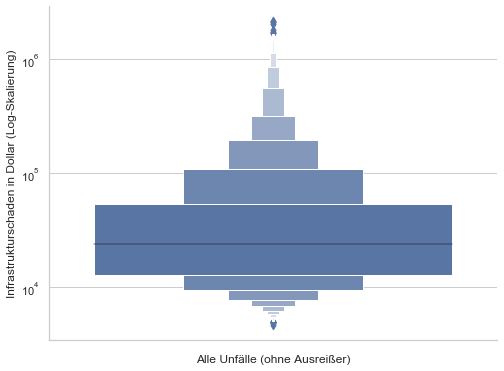

In [49]:
ax = sns.catplot(y='INFRASTRUCTURE_DMG', data=df, kind='boxen', height=5, aspect=1.5)
sns.despine()
plt.yscale("log")
ax.set_ylabels("Infrastrukturschaden in Dollar (Log-Skalierung)")
ax.set_xlabels("Alle Unfälle (ohne Ausreißer)")
plt.savefig('Images/Multi_Train/Boxplot_Infrastrukturschaden_ohne_Ausreißer.png')



#### Histogramm Infrastrukturschaden (ohne Ausreißer)¶

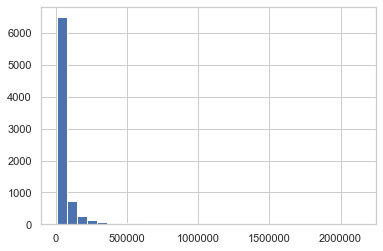

In [50]:
df['INFRASTRUCTURE_DMG'].hist(bins=30)
plt.savefig('Images/Multi_Train/Histogramm_Infrastrukturschaden_ohne_Ausreißer.png')



#### Boxenplot Materialschaden (ohne Ausreißer) <a class="anchor" id="EQPDMG"></a>

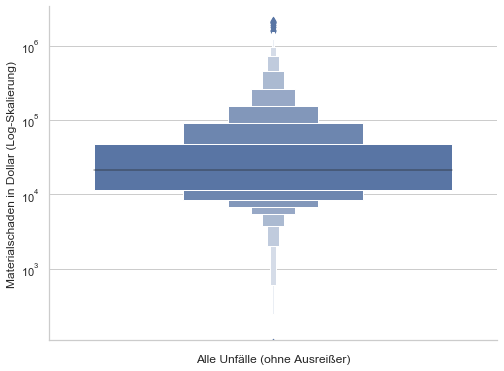

In [51]:
ax = sns.catplot(y='EQPDMG', data=df, kind='boxen', height=5, aspect=1.5)
sns.despine()
plt.yscale("log")
ax.set_ylabels("Materialschaden in Dollar (Log-Skalierung)")
ax.set_xlabels("Alle Unfälle (ohne Ausreißer)")
plt.savefig('Images/Multi_Train/Boxplot_Materialschaden_ohne_Ausreißer.png')



#### Histogramm Materialschaden (ohne Ausreißer)¶

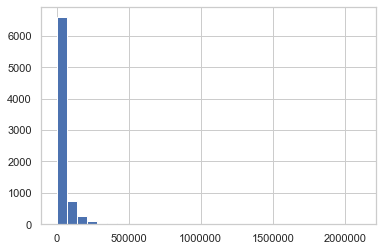

In [52]:
df['EQPDMG'].hist(bins=30)
plt.savefig('Images/Multi_Train/Histogramm_Materialschaden_ohne_Ausreißer.png')



#### Boxenplot Streckenchaden (ohne Ausreißer) <a class="anchor" id="TRKDMG"></a>

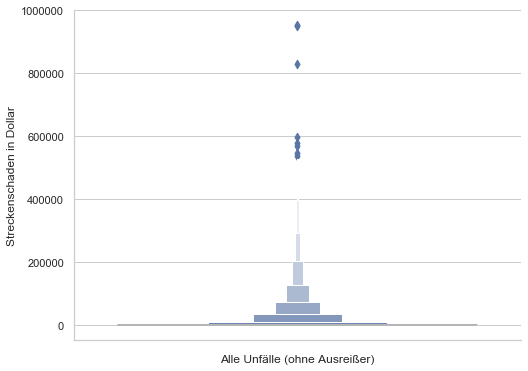

In [53]:
ax = sns.catplot(y='TRKDMG', data=df, kind='boxen', height=5, aspect=1.5)
sns.despine()
ax.set_ylabels("Streckenschaden in Dollar")
ax.set_xlabels("Alle Unfälle (ohne Ausreißer)")
plt.savefig('Images/Multi_Train/Boxplot_Streckenschaden_ohne_Ausreißer.png')



#### Histogramm Materialschaden (ohne Ausreißer)¶

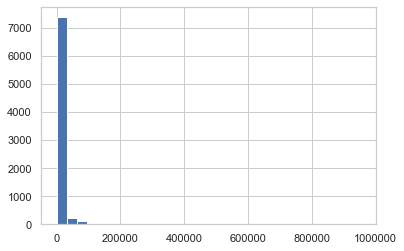

In [54]:
df['TRKDMG'].hist(bins=30)
plt.savefig('Images/Multi_Train/Histogramm_Streckenschaden_ohne_Ausreißer.png')



#### Boxenplot Zuggeschwindigkeit <a class="anchor" id="zuggeschwindigkeit"></a>

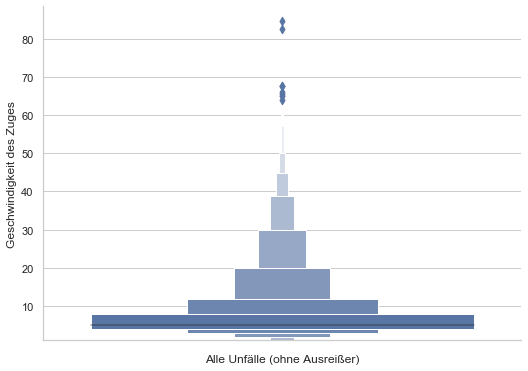

In [55]:
ax = sns.catplot(y='SPEED', data=df, kind='boxen', height=5, aspect=1.5)
sns.despine()
ax.set_ylabels("Geschwindigkeit des Zuges")
ax.set_xlabels("Alle Unfälle (ohne Ausreißer)")
plt.savefig('Images/Multi_Train/Boxplot_Zuggeschwindigkeit.png')



#### Histogramm Zuggeschwindigkeit

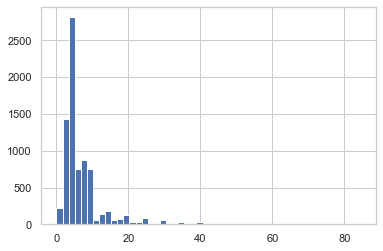

In [56]:
df['SPEED'].hist(bins=50)
plt.savefig('Images/Multi_Train/Histogramm_Zuggeschwindigkeit.png')



#### Boxenplot Zuggewicht <a class="anchor" id="tons"></a>

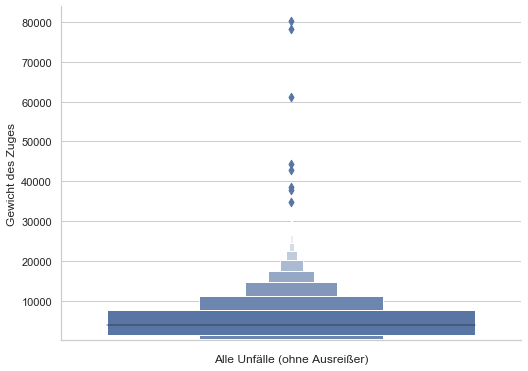

In [57]:
ax = sns.catplot(y='TONS', data=df, kind='boxen', height=5, aspect=1.5)
sns.despine()
ax.set_ylabels("Gewicht des Zuges")
ax.set_xlabels("Alle Unfälle (ohne Ausreißer)")
plt.savefig('Images/Multi_Train/Boxplot_Zuggewicht.png')



#### Histogramm Zuggewicht

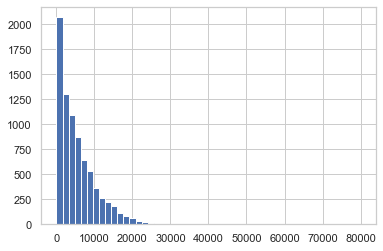

In [58]:
df['TONS'].hist(bins=50)
plt.savefig('Images/Multi_Train/Histogramm_Zuggewicht.png')



#### Boxenplot Zugart und Geschwindigkeit <a class="anchor" id="zugart"></a>


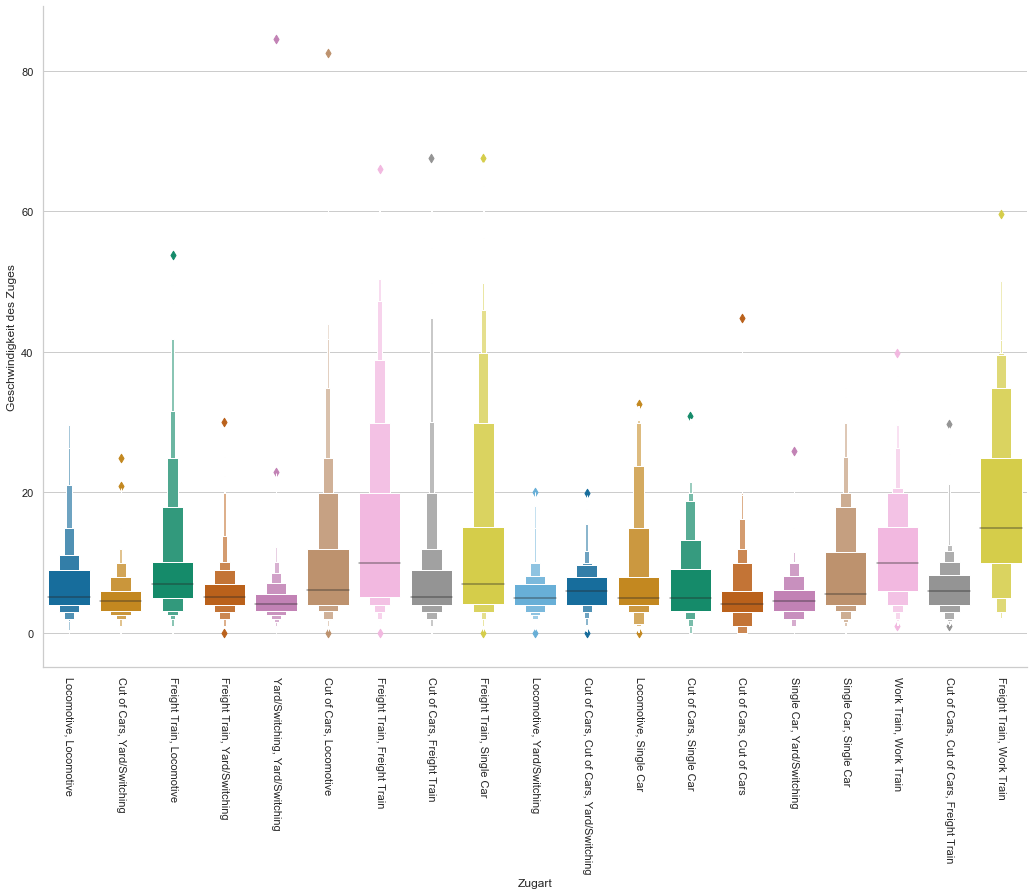

In [59]:
ax = sns.catplot(y='SPEED', x='EQUIPMENT_TYPE', data=custom_df, palette="colorblind", kind='boxen', height=10, aspect=1.5)
sns.despine()
for x in ax.axes.flat:
    for label in x.get_xticklabels():
        label.set_rotation(-90)
ax.set_ylabels("Geschwindigkeit des Zuges")
ax.set_xlabels("Zugart")
plt.savefig('Images/Multi_Train/Boxplot_Geschwindigkeit_Zugart.png')



#### Boxenplot Zugart und Gewicht

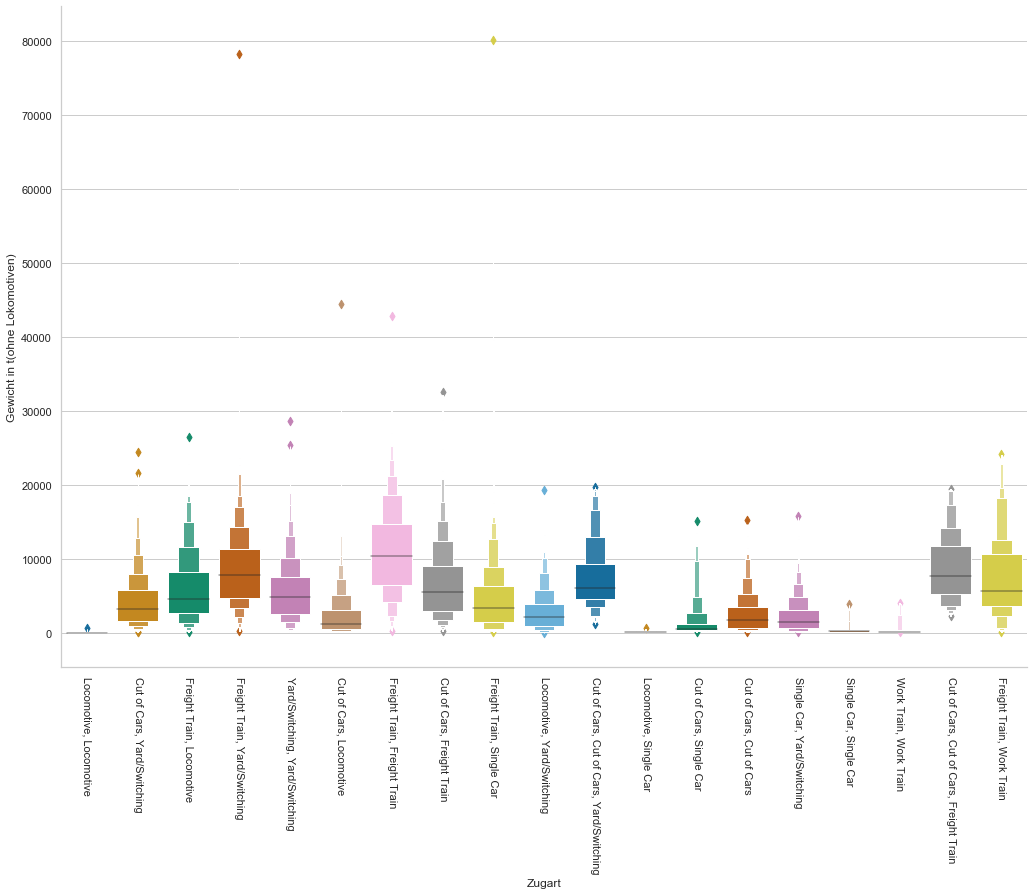

In [60]:
ax = sns.catplot(y='TONS', x='EQUIPMENT_TYPE', data=custom_df, palette="colorblind", kind='boxen', height=10, aspect=1.5)
sns.despine()
for x in ax.axes.flat:
    for label in x.get_xticklabels():
        label.set_rotation(-90)
ax.set_ylabels("Gewicht in t(ohne Lokomotiven)")
ax.set_xlabels("Zugart")
plt.savefig('Images/Multi_Train/Boxplot_Gewicht_Zugart.png')




#### Boxenplot Infrastrukturschaden und Zugart

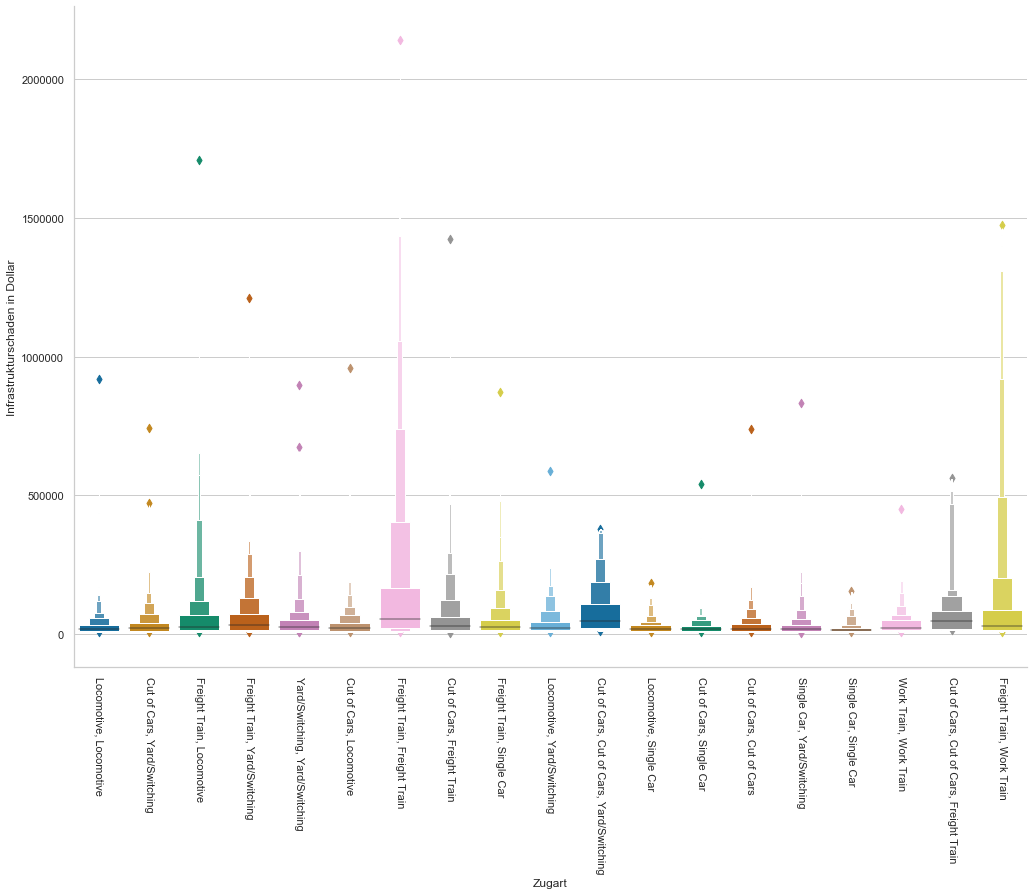

In [61]:
ax = sns.catplot(y='INFRASTRUCTURE_DMG', x='EQUIPMENT_TYPE', data=custom_df, palette="colorblind", kind='boxen', height=10, aspect=1.5)
sns.despine()
for x in ax.axes.flat:
    for label in x.get_xticklabels():
        label.set_rotation(-90)
ax.set_ylabels("Infrastrukturschaden in Dollar")
ax.set_xlabels("Zugart")
plt.savefig('Images/Multi_Train/Boxplot_Infrastruktur_Zugart.png')





#### Boxenplot Materialschaden und Zugart

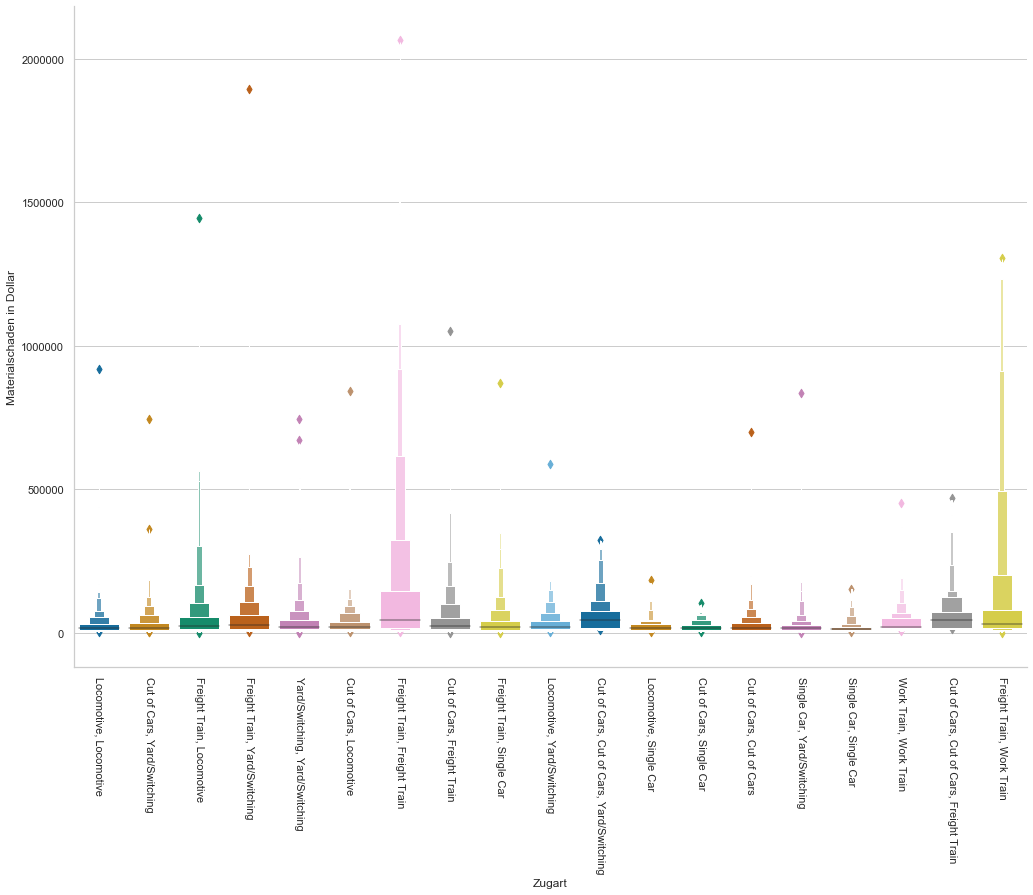

In [62]:
ax = sns.catplot(y='EQPDMG', x='EQUIPMENT_TYPE', data=custom_df, palette="colorblind", kind='boxen', height=10, aspect=1.5)
sns.despine()
for x in ax.axes.flat:
    for label in x.get_xticklabels():
        label.set_rotation(-90)
ax.set_ylabels("Materialschaden in Dollar")
ax.set_xlabels("Zugart")
plt.savefig('Images/Multi_Train/Boxplot_Material_Zugart.png')





#### Boxenplot Infrastrukturschaden und Unfallart <a class="anchor" id="unfallart"></a>


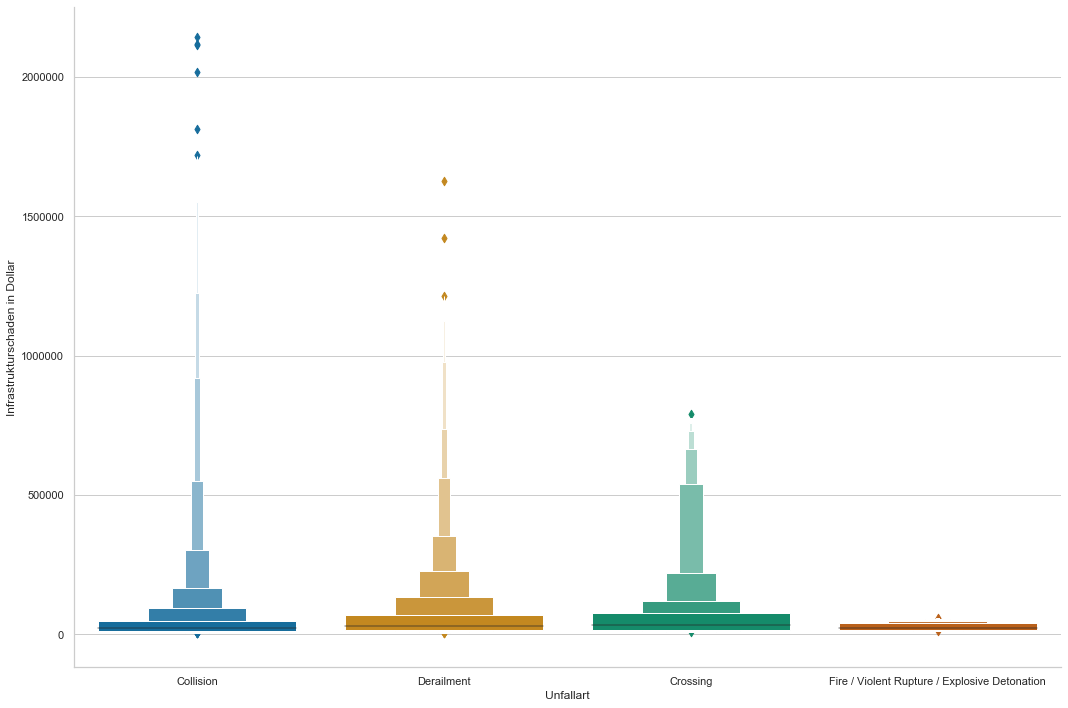

In [63]:
ax = sns.catplot(y='INFRASTRUCTURE_DMG', x='ACCIDENT_TYPE', data=df, palette="colorblind", kind='boxen', height=10, aspect=1.5)
sns.despine()
ax.set_ylabels("Infrastrukturschaden in Dollar")
ax.set_xlabels("Unfallart")
plt.savefig('Images/Multi_Train/Boxplot_Infrastruktur_Unfallart.png')



#### Boxenplot Materialschaden und Unfallart

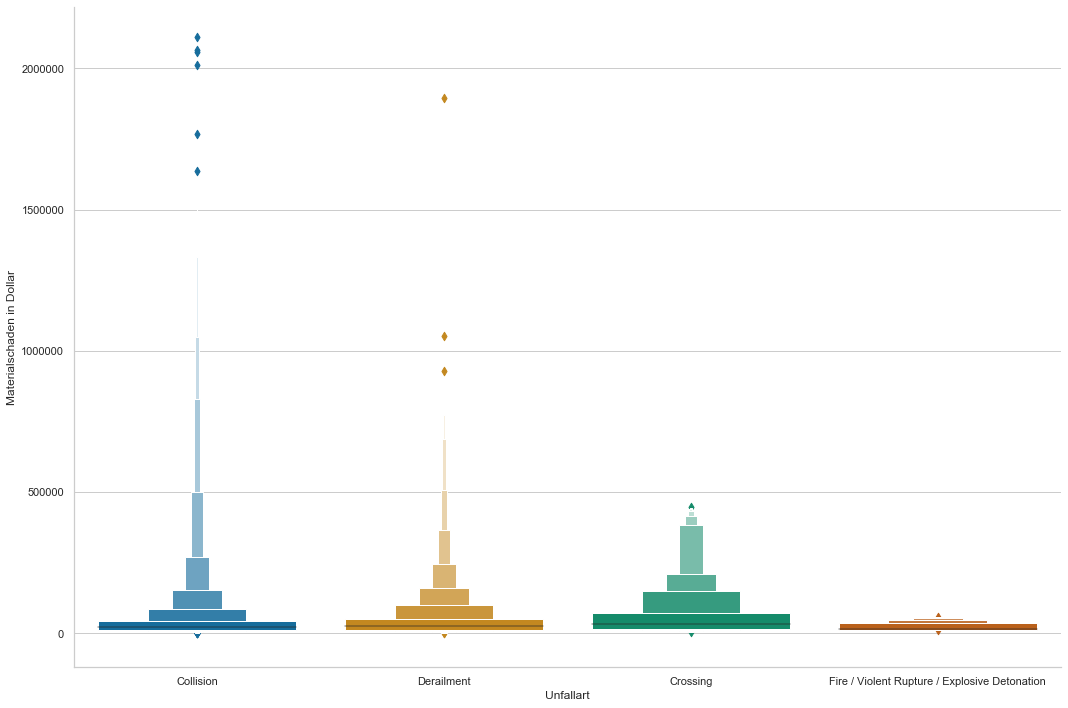

In [64]:
ax = sns.catplot(y='EQPDMG', x='ACCIDENT_TYPE', data=df, palette="colorblind", kind='boxen', height=10, aspect=1.5)
sns.despine()
ax.set_ylabels("Materialschaden in Dollar")
ax.set_xlabels("Unfallart")
plt.savefig('Images/Multi_Train/Boxplot_Material_Unfallart.png')




#### Boxenplot Infrastrukturschaden und Streckenart <a class="anchor" id="typtrk"></a>

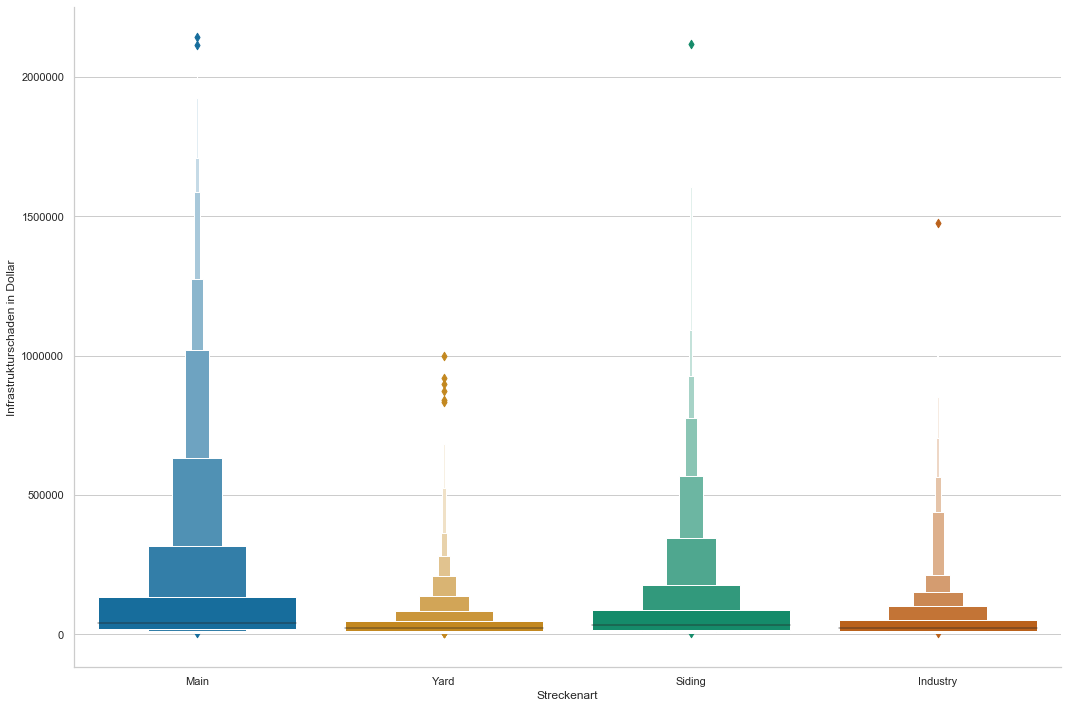

In [65]:
ax = sns.catplot(y='INFRASTRUCTURE_DMG', x='TYPTRK', data=df, palette="colorblind", kind='boxen', height=10, aspect=1.5)
sns.despine()
ax.set_ylabels("Infrastrukturschaden in Dollar")
ax.set_xlabels("Streckenart")
plt.savefig('Images/Multi_Train/Boxplot_Infrastruktur_Streckenart.png')




#### Boxenplot Materialschaden und Streckenart

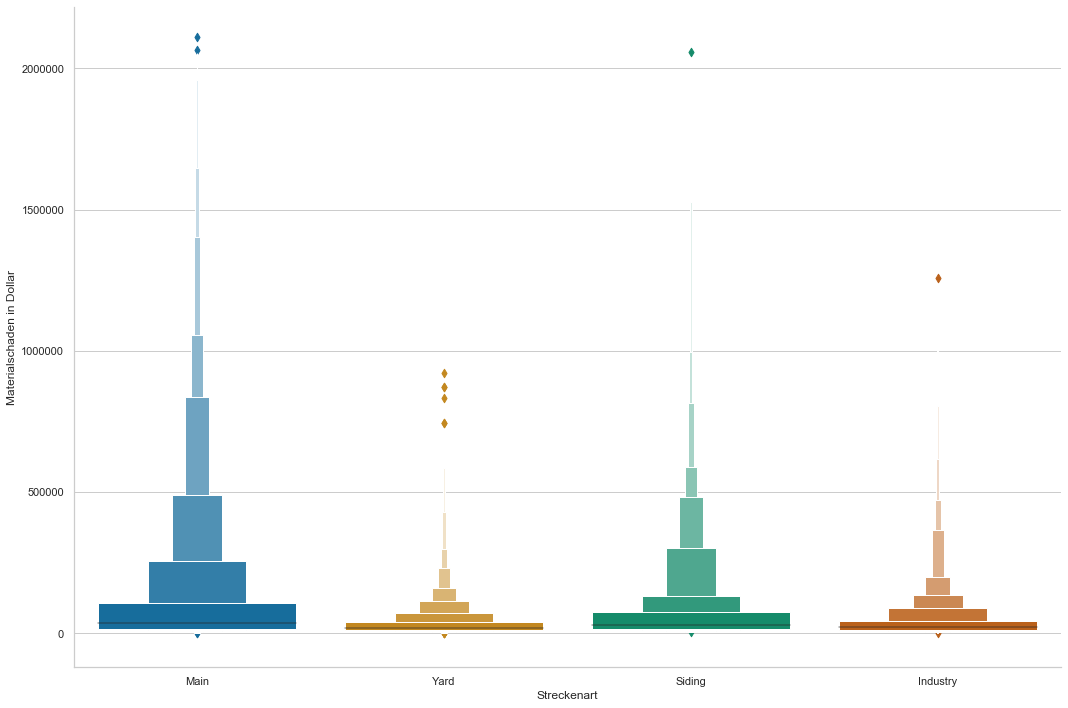

In [66]:
ax = sns.catplot(y='EQPDMG', x='TYPTRK', data=df, palette="colorblind", kind='boxen', height=10, aspect=1.5)
sns.despine()
ax.set_ylabels("Materialschaden in Dollar")
ax.set_xlabels("Streckenart")
plt.savefig('Images/Multi_Train/Boxplot_Material_Streckenart.png')




#### Boxenplot Infrastrukturschaden und Unfallursache <a class="anchor" id="cause"></a>

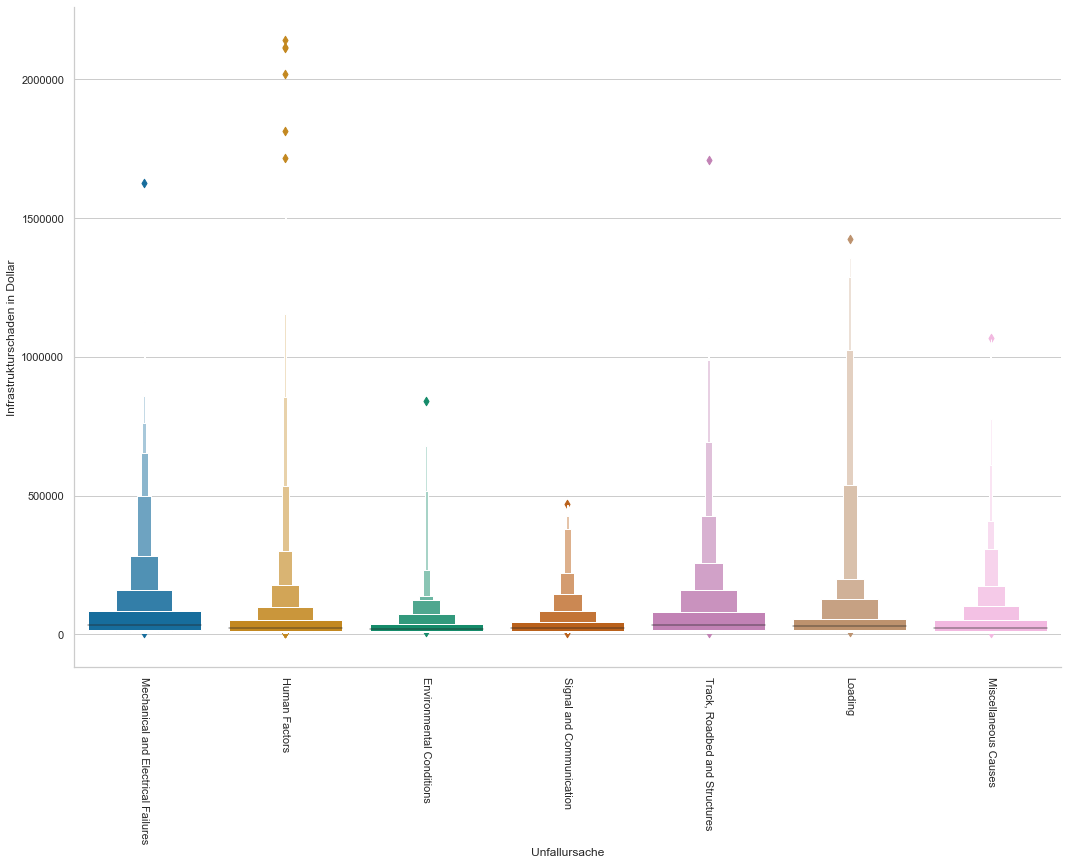

In [67]:
ax = sns.catplot(y='INFRASTRUCTURE_DMG', x='ACCCAUSE_LVL2', data=df, palette="colorblind", kind='boxen', height=10, aspect=1.5)
sns.despine()
for x in ax.axes.flat:
    for label in x.get_xticklabels():
        label.set_rotation(-90)
ax.set_ylabels("Infrastrukturschaden in Dollar")
ax.set_xlabels("Unfallursache")
plt.savefig('Images/Multi_Train/Boxplot_Infrastruktur_Unfallursache.png')




#### Boxenplot Materialschaden und Unfallursache

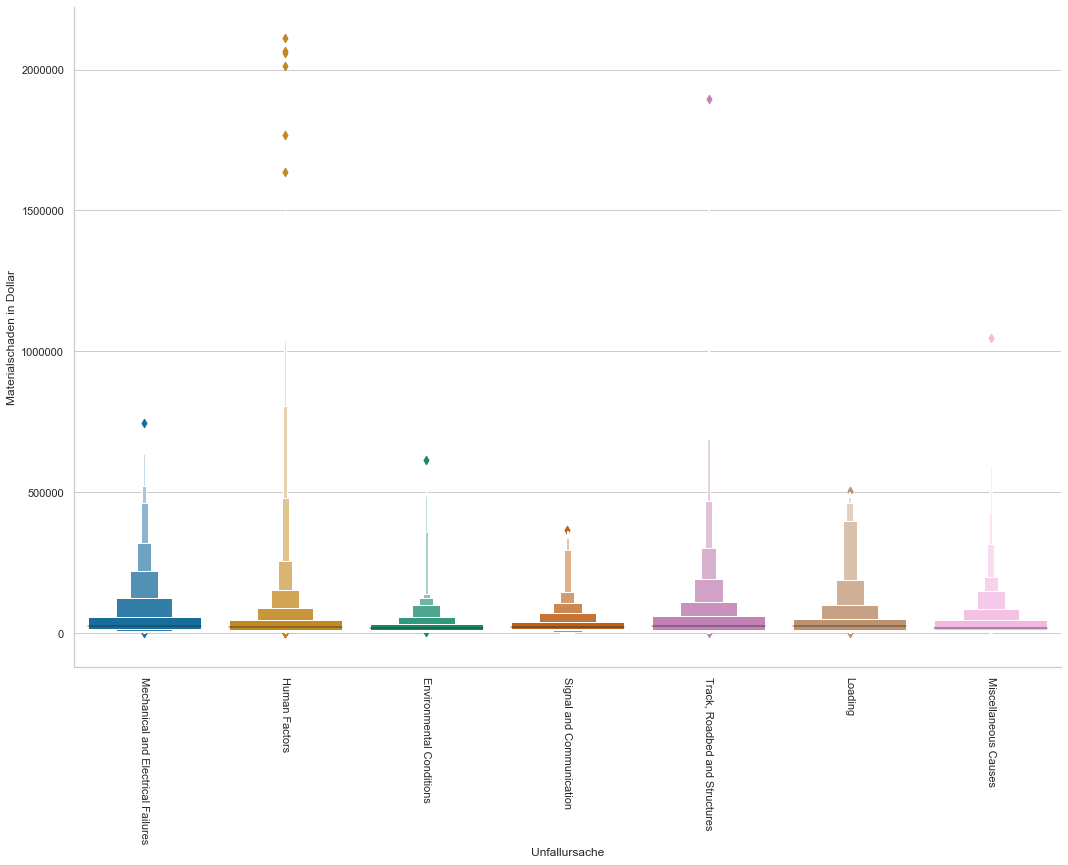

In [68]:
ax = sns.catplot(y='EQPDMG', x='ACCCAUSE_LVL2', data=df, palette="colorblind", kind='boxen', height=10, aspect=1.5)
sns.despine()
for x in ax.axes.flat:
    for label in x.get_xticklabels():
        label.set_rotation(-90)
ax.set_ylabels("Materialschaden in Dollar")
ax.set_xlabels("Unfallursache")
plt.savefig('Images/Multi_Train/Boxplot_Material_Unfallursache.png')




#### Boxenplot Infrastrukturschaden und Unfallschwere <a class="anchor" id="unfallsignifikanz"></a>


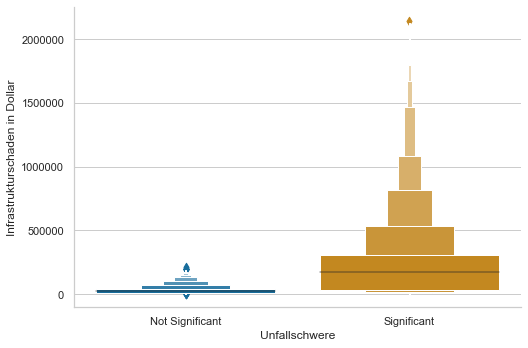

In [69]:
ax = sns.catplot(y='INFRASTRUCTURE_DMG', x='ACCTYPE', data=df, palette="colorblind", kind='boxen', height=5, aspect=1.5)
sns.despine()
ax.set_ylabels("Infrastrukturschaden in Dollar")
ax.set_xlabels("Unfallschwere")
plt.savefig('Images/Multi_Train/Boxplot_Infrastruktur_Unfallschwere.png')





#### Boxenplot Materialschaden und Unfallschwere

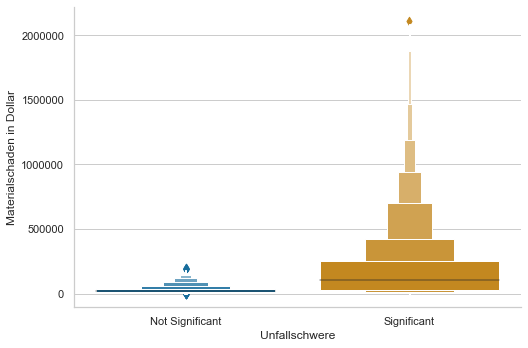

In [70]:
ax = sns.catplot(y='EQPDMG', x='ACCTYPE', data=df, palette="colorblind", kind='boxen', height=5, aspect=1.5)
sns.despine()
ax.set_ylabels("Materialschaden in Dollar")
ax.set_xlabels("Unfallschwere")
plt.savefig('Images/Multi_Train/Boxplot_Material_Unfallschwere.png')




#### Boxenplot Infrastrukturschaden und Wetter <a class="anchor" id="wetter"></a>


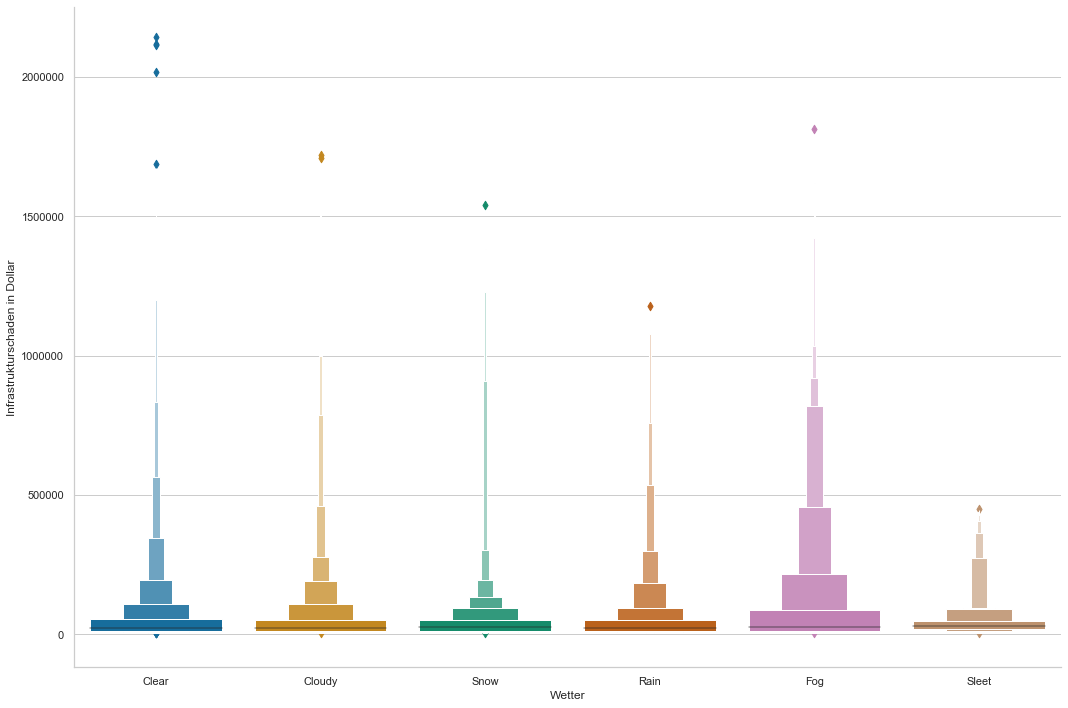

In [71]:
ax = sns.catplot(y='INFRASTRUCTURE_DMG', x='WEATHER', data=df, palette="colorblind", kind='boxen', height=10, aspect=1.5)
sns.despine()
ax.set_ylabels("Infrastrukturschaden in Dollar")
ax.set_xlabels("Wetter")
plt.savefig('Images/Multi_Train/Boxplot_Infrastruktur_Wetter.png')




#### Boxenplot Materialschaden und Wetter

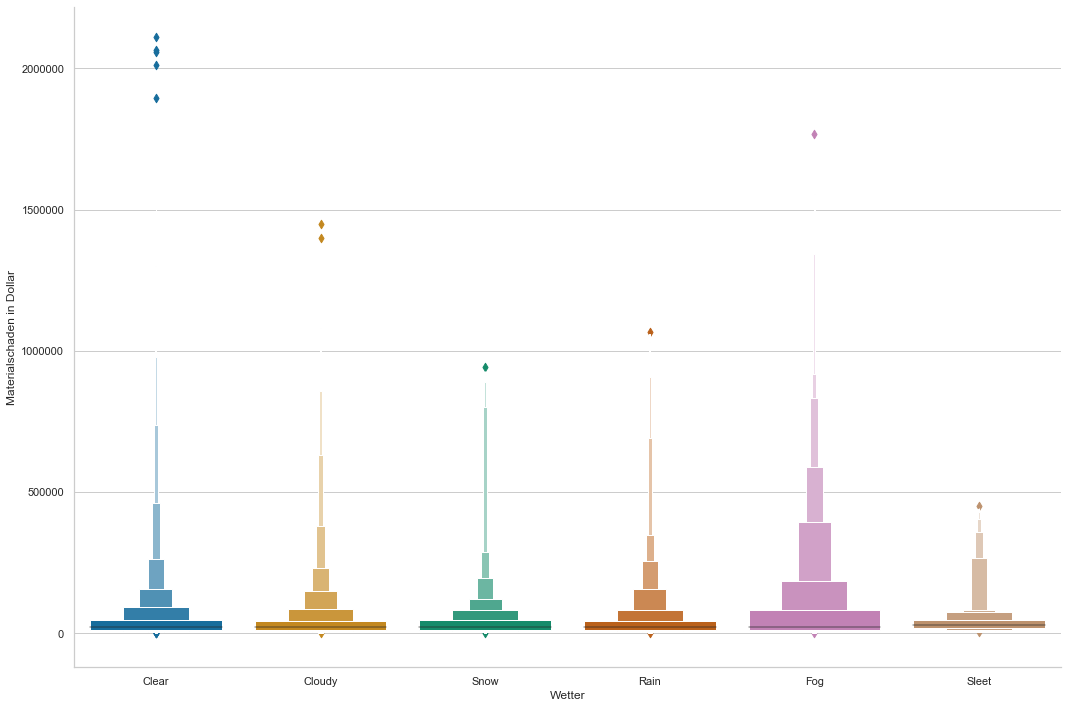

In [72]:
ax = sns.catplot(y='EQPDMG', x='WEATHER', data=df, palette="colorblind", kind='boxen', height=10, aspect=1.5)
ax.set_ylabels("Materialschaden in Dollar")
ax.set_xlabels("Wetter")
plt.savefig('Images/Multi_Train/Boxplot_Material_Wetter.png')




#### Boxenplot Infrastrukturschaden und Temperatur <a class="anchor" id="temp"></a>


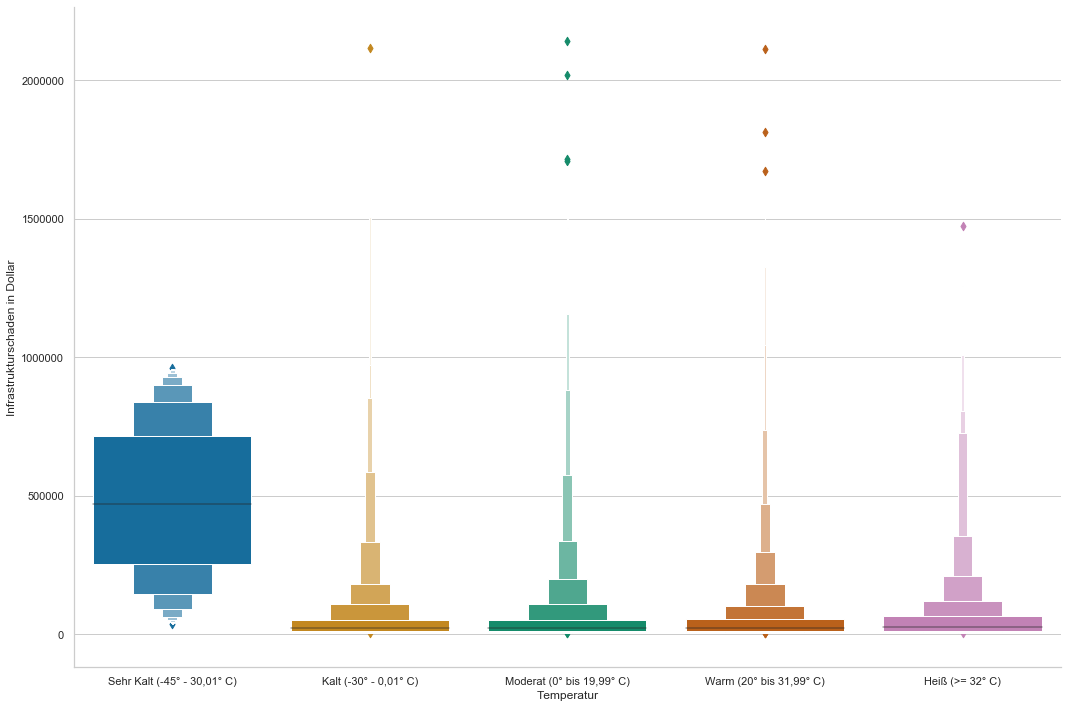

In [73]:
ax = sns.catplot(y='INFRASTRUCTURE_DMG', x='TEMP_CLUSTER', data=df, palette="colorblind", order=temp_order, kind='boxen', height=10, aspect=1.5)
sns.despine()
ax.set_ylabels("Infrastrukturschaden in Dollar")
ax.set_xlabels("Temperatur")
plt.savefig('Images/Multi_Train/Boxplot_Infrastruktur_Temperatur.png')



#### Boxenplot Materialschaden und Temperatur

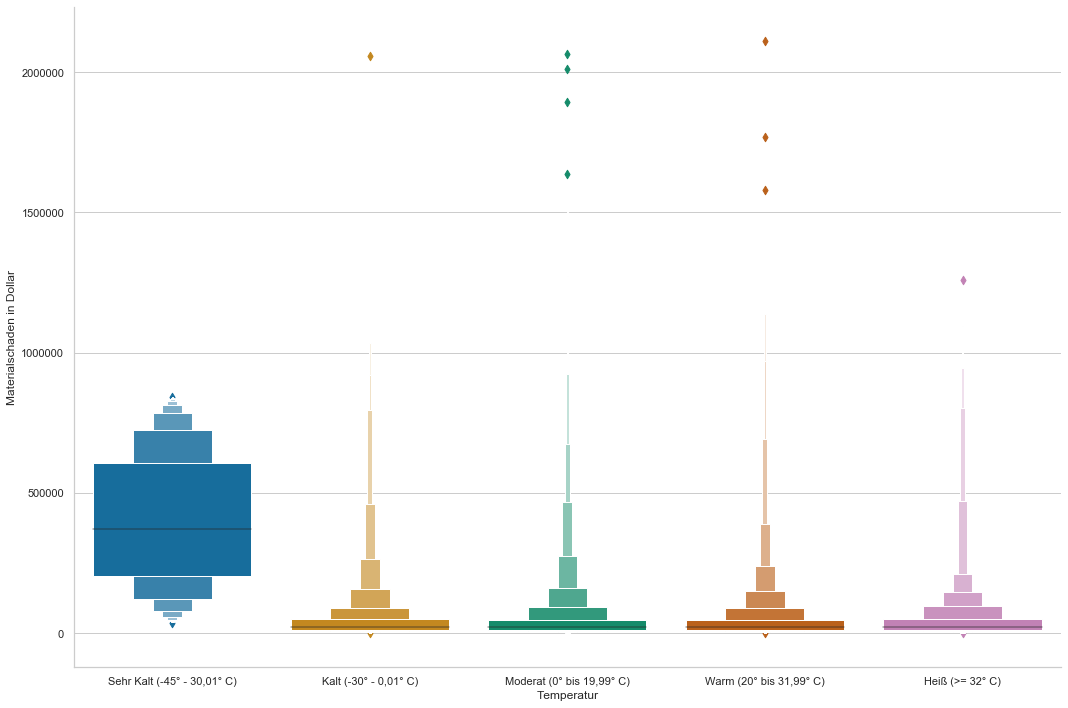

In [74]:
ax = sns.catplot(y='EQPDMG', x='TEMP_CLUSTER', data=df, palette="colorblind", order=temp_order, kind='boxen', height=10, aspect=1.5)
sns.despine()
ax.set_ylabels("Materialschaden in Dollar")
ax.set_xlabels("Temperatur")
plt.savefig('Images/Multi_Train/Boxplot_Material_Temperatur.png')



#### Boxenplot Infrastrukturschaden und Sichtbarkeit <a class="anchor" id="vis"></a>


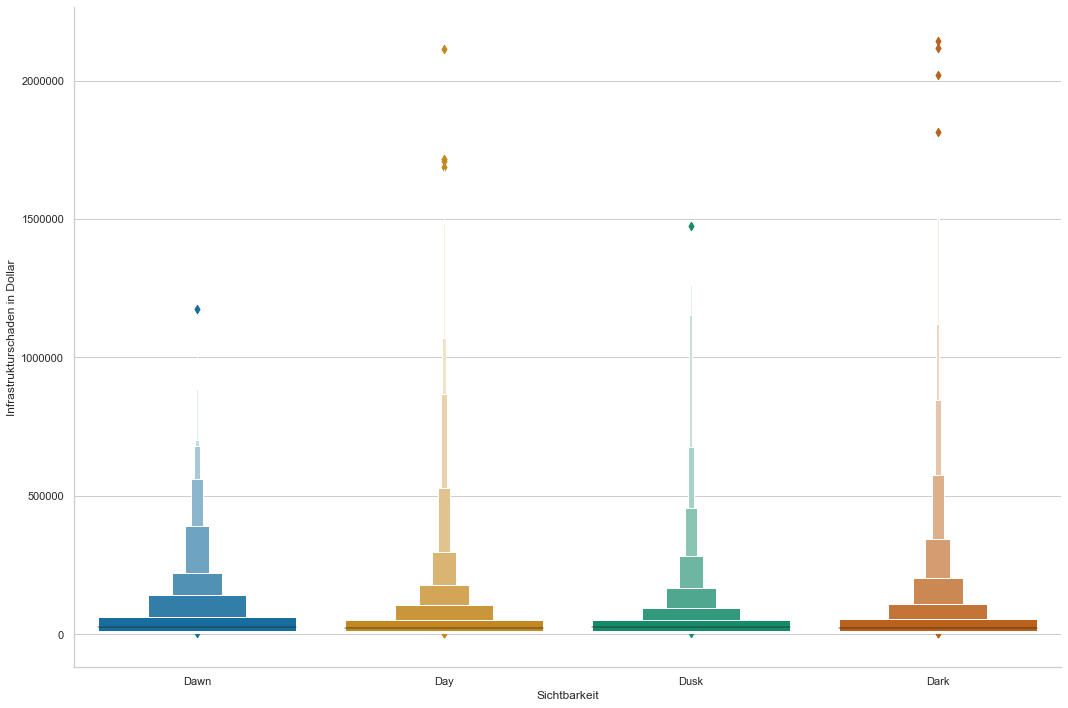

In [75]:
ax = sns.catplot(y='INFRASTRUCTURE_DMG', x='VISIBLTY', data=df, palette="colorblind", kind='boxen', order=vis_order, height=10, aspect=1.5)
sns.despine()
ax.set_ylabels("Infrastrukturschaden in Dollar")
ax.set_xlabels("Sichtbarkeit")
plt.savefig('Images/Multi_Train/Boxplot_Infrastruktur_Sichtbarkeit.png')



#### Boxenplot Materialschaden und Temperatur

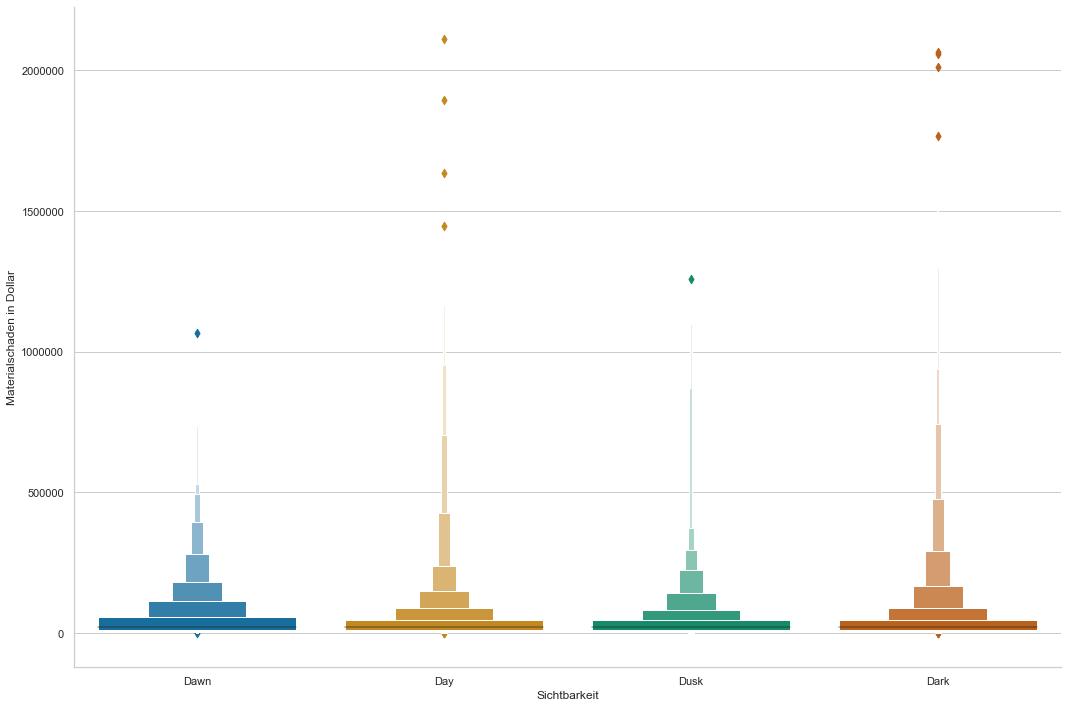

In [76]:
ax = sns.catplot(y='EQPDMG', x='VISIBLTY', data=df, palette="colorblind", order=vis_order, kind='boxen', height=10, aspect=1.5)
sns.despine()
ax.set_ylabels("Materialschaden in Dollar")
ax.set_xlabels("Sichtbarkeit")
plt.savefig('Images/Multi_Train/Boxplot_Material_Sichtbarkeit.png')



#### Boxenplot Infrastrukturschaden und Jahreszeit <a class="anchor" id="jahreszeit"></a>


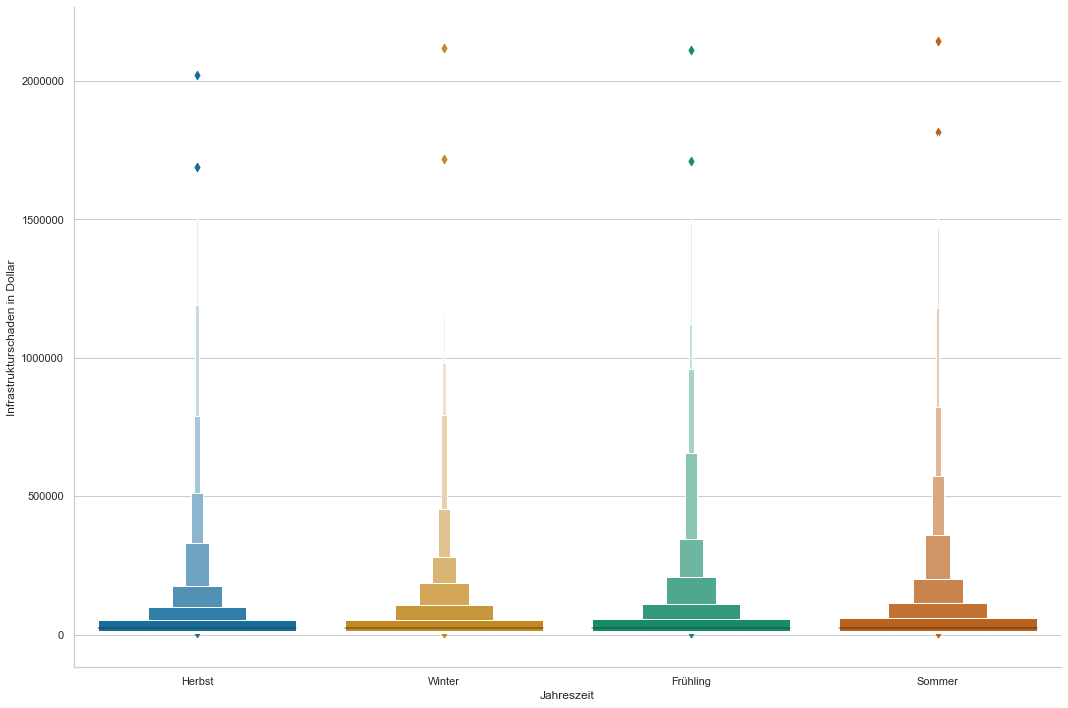

In [77]:
ax = sns.catplot(y='INFRASTRUCTURE_DMG', x='Jahreszeit', data=df, palette="colorblind", kind='boxen', height=10, aspect=1.5)
ax.set_ylabels("Infrastrukturschaden in Dollar")
ax.set_xlabels("Jahreszeit")
plt.savefig('Images/Multi_Train/Boxplot_Infrastruktur_Jahreszeit.png')



#### Boxenplot Infrastrukturschaden und Jahreszeit (nach Unfallursache)

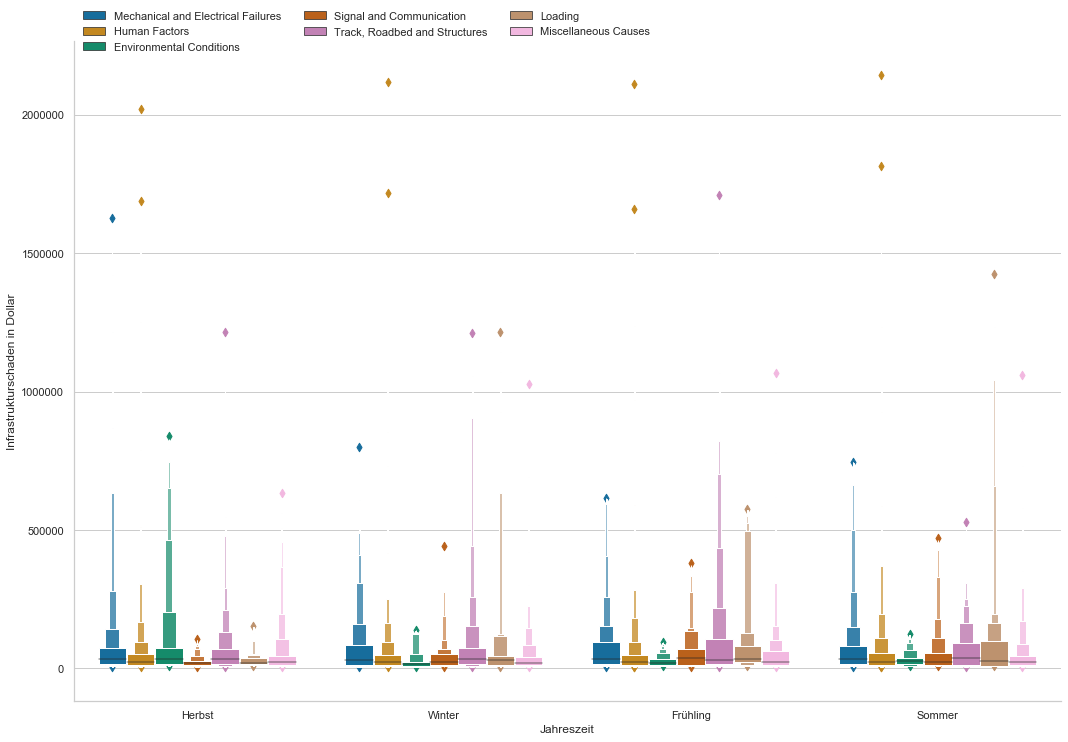

In [78]:
bp = sns.catplot(y='INFRASTRUCTURE_DMG', x='Jahreszeit', data=df, palette="colorblind", hue='ACCCAUSE_LVL2', kind="boxen", legend=False, height=10, aspect=1.5)
plt.legend(bbox_to_anchor=(0, 1.06), loc='upper left', ncol=3, frameon=False)
bp.set_ylabels("Infrastrukturschaden in Dollar")
bp.set_xlabels("Jahreszeit")
plt.savefig('Images/Multi_Train/Boxplot_Infrastruktur_Ursache_Sommer.png')



#### Boxenplot Materialschaden und Jahreszeit

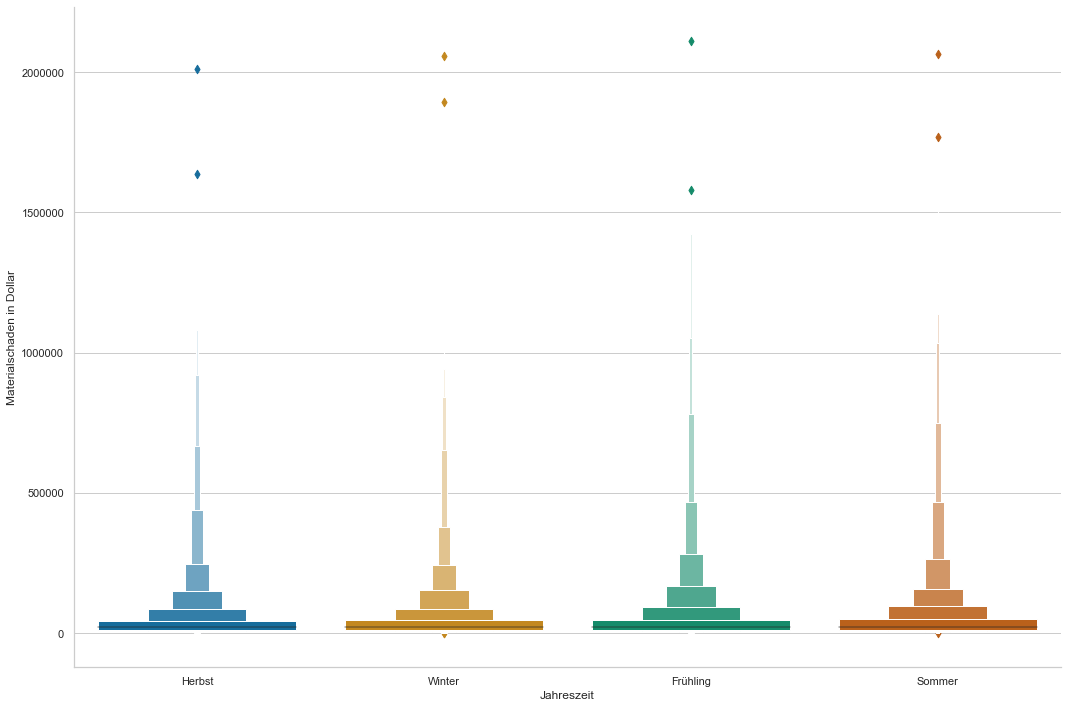

In [79]:
ax = sns.catplot(y='EQPDMG', x='Jahreszeit', data=df, palette="colorblind", kind='boxen', height=10, aspect=1.5)
sns.despine()
ax.set_ylabels("Materialschaden in Dollar")
ax.set_xlabels("Jahreszeit")
plt.savefig('Images/Multi_Train/Boxplot_Material_Jahreszeit.png')



#### Boxenplot Materialschaden und Jahreszeit (nach Unfallursache)

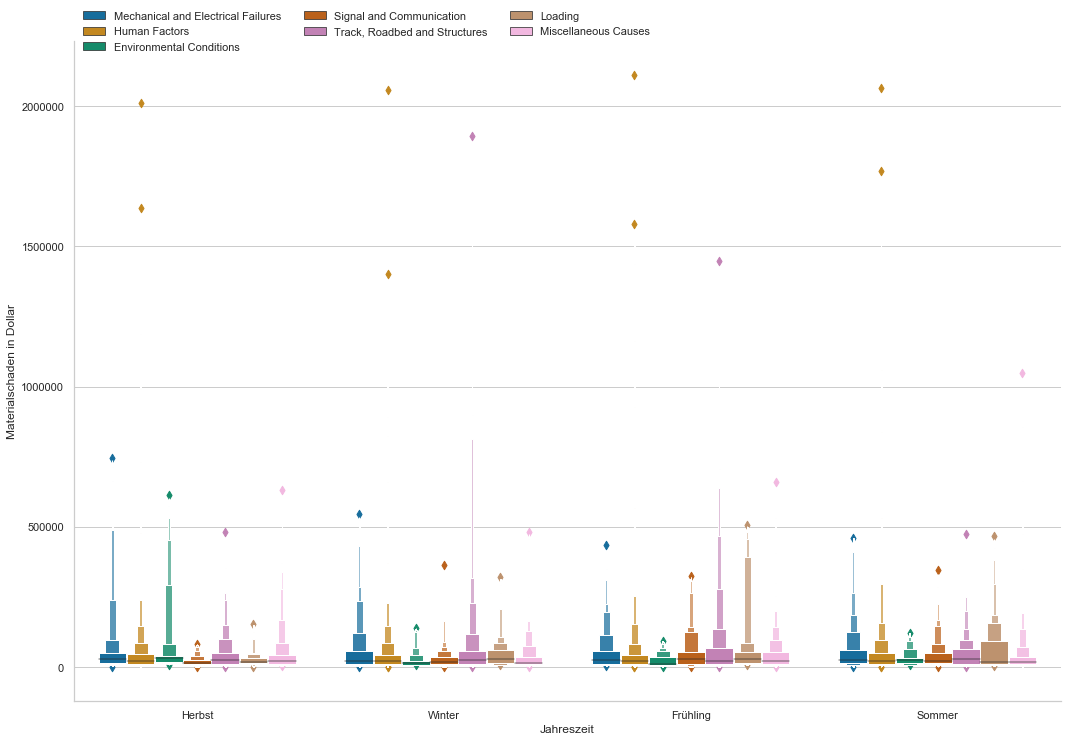

In [80]:
bp = sns.catplot(y='EQPDMG', x='Jahreszeit', data=df, palette="colorblind", hue='ACCCAUSE_LVL2', kind="boxen", legend=False, height=10, aspect=1.5)
plt.legend(bbox_to_anchor=(0, 1.06), loc='upper left', ncol=3, frameon=False)
bp.set_ylabels("Materialschaden in Dollar")
bp.set_xlabels("Jahreszeit")
plt.savefig('Images/Multi_Train/Boxplot_Material_Ursache_Sommer.png')
plt.show()



#### Boxenplot Infrastrukturschaden und Jahr <a class="anchor" id="jahr"></a>

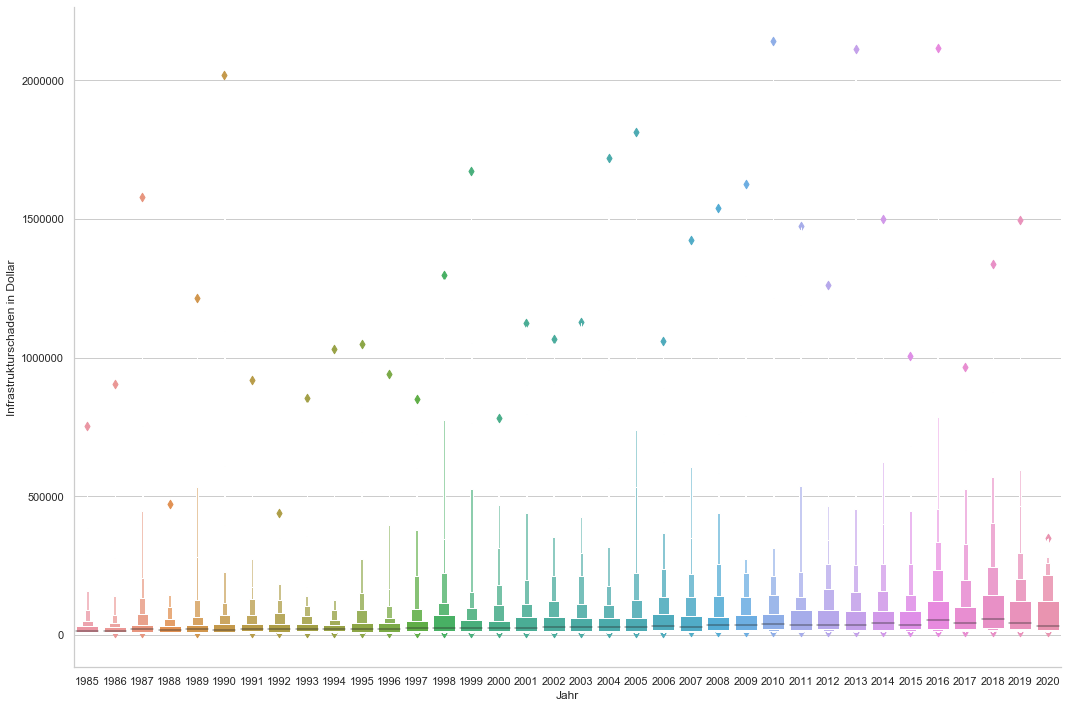

In [81]:
bp = sns.catplot(x="YEAR4", y="INFRASTRUCTURE_DMG", data=df, kind="boxen", height=10, aspect=1.5)
bp.set_xlabels('Jahr', fontsize=12)
bp.set_ylabels('Infrastrukturschaden in Dollar', fontsize=12)
plt.savefig('Images/Multi_Train/Boxplot_Infrastruktur_Jahr.png')



#### Boxenplot Materialschaden und Jahr

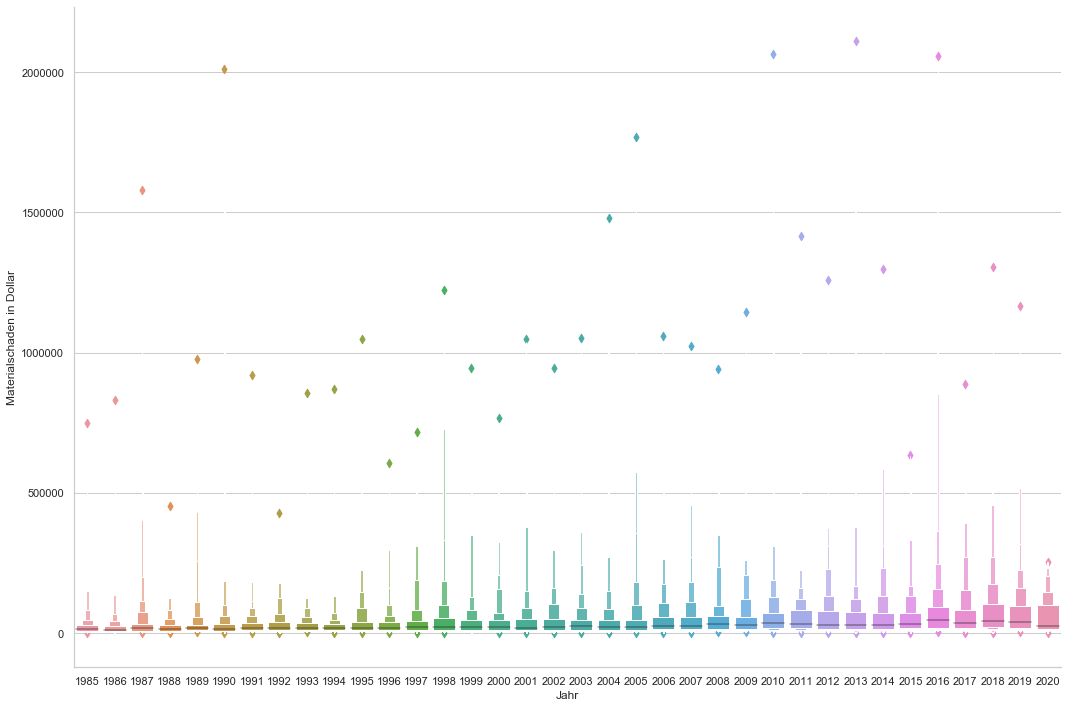

In [82]:
bp = sns.catplot(x="YEAR4", y="EQPDMG", data=df, kind="boxen", height=10, aspect=1.5)
bp.set_xlabels('Jahr', fontsize=12)
bp.set_ylabels('Materialschaden in Dollar', fontsize=12)
plt.savefig('Images/Multi_Train/Boxplot_Material_Jahr.png')



#### Boxenplot Streckenschaden und Jahr

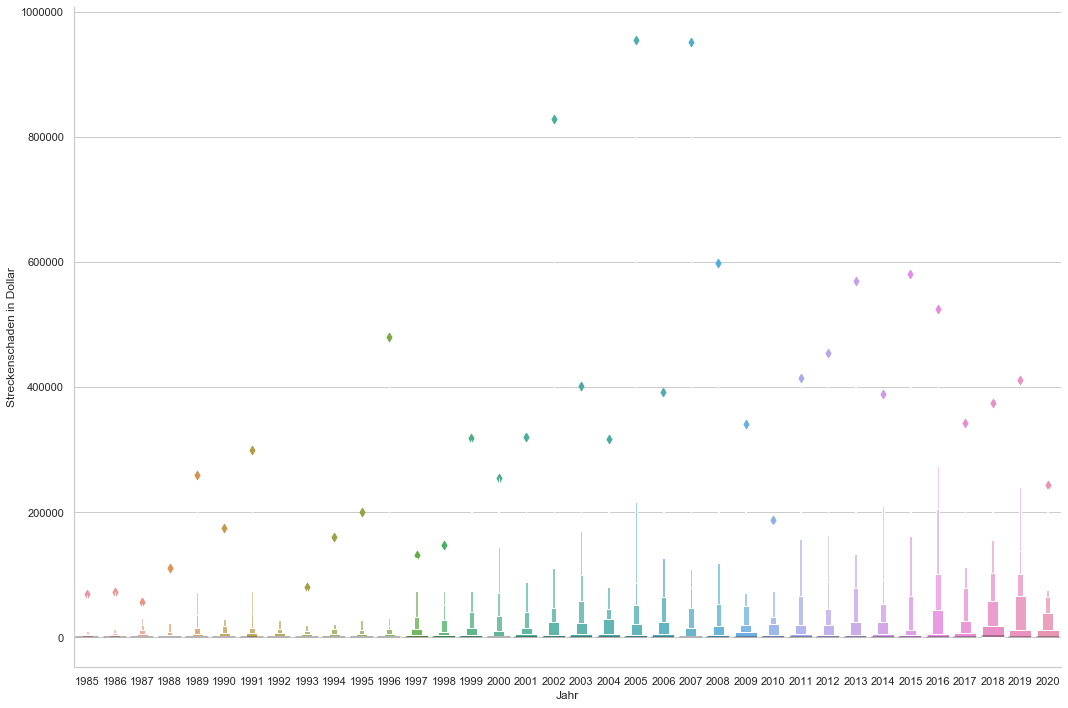

In [83]:
bp = sns.catplot(x="YEAR4", y="TRKDMG", data=df, kind="boxen", height=10, aspect=1.5)
bp.set_xlabels('Jahr', fontsize=12)
bp.set_ylabels('Streckenschaden in Dollar', fontsize=12)
plt.savefig('Images/Multi_Train/Boxplot_Strecke_Jahr.png')



#### Boxenplot Infrastrukturschaden und Zug zu schnell? <a class="anchor" id="speed"></a>


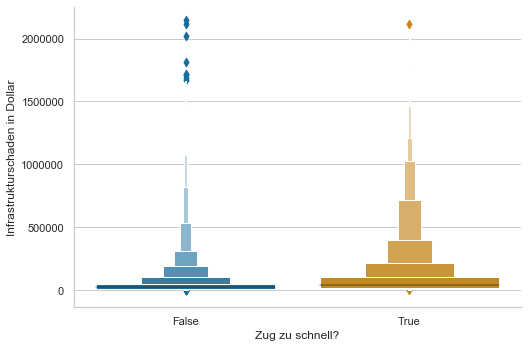

In [84]:
ax = sns.catplot(y='INFRASTRUCTURE_DMG', x='SPD_TOO_HIGH', data=df, palette="colorblind", kind='boxen', height=5, aspect=1.5)
sns.despine()
ax.set_ylabels("Infrastrukturschaden in Dollar")
ax.set_xlabels("Zug zu schnell?")
plt.savefig('Images/Multi_Train/Boxplot_Infrastruktur_Zug_zu_schnell.png')




#### Boxenplot Materialschaden und Zug zu schnell?

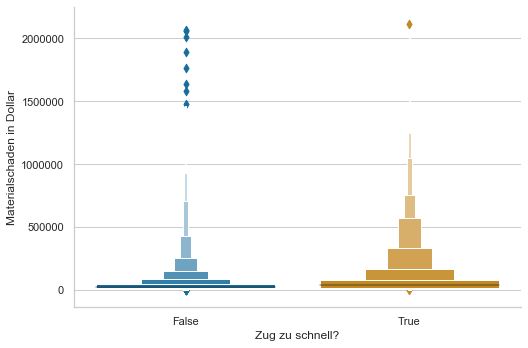

In [85]:
ax = sns.catplot(y='EQPDMG', x='SPD_TOO_HIGH', data=df, palette="colorblind", kind='boxen', height=5, aspect=1.5)
sns.despine()
ax.set_ylabels("Materialschaden in Dollar")
ax.set_xlabels("Zug zu schnell?")
plt.savefig('Images/Multi_Train/Boxplot_Material_Zug_zu_schnell.png')





### Common Statistics <a class="anchor" id="common_statistics"></a>

In [86]:
x_data = df[['YEAR4', 'MONTH', 'LOCOMOTIVES1', 'LOADF1', 'LOADP1', 'EMPTYF1', 'EMPTYP1','LOCOMOTIVES2', 'LOADF2', 'EMPTYF2', 'TONS', 'TEMP_CLUSTER', 'SPEED', 'ACCCAUSE_LVL1', 'ACCIDENT_TYPE', 'EQUIPMENT_TYPE', 'TYPTRK', 'VISIBLTY', 'WEATHER', 'STATE', 'SPD_TOO_HIGH', 'ACCTYPE', 'Jahreszeit']]
y = df['INFRASTRUCTURE_DMG']

In [87]:
x_data.describe(include=np.number, percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9])

,YEAR4,MONTH,LOCOMOTIVES1,LOADF1,LOADP1,EMPTYF1,EMPTYP1,LOCOMOTIVES2,LOADF2,EMPTYF2,TONS,SPEED
count,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000
mean,2000.012879,6.532702,2.975126,39.130051,0.004419,29.608712,0.011111,0.207071,1.348611,1.323359,5412.805471,7.487277
std,9.966497,3.424866,1.901811,39.526162,0.104722,34.206725,0.181553,0.551251,2.231418,2.107326,5240.843239,7.753526
min,1985.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,1987.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,2.500000
20%,1989.000000,3.000000,1.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1005.896235,3.000000
30%,1993.000000,4.000000,2.000000,11.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1954.352898,3.954272
40%,1996.000000,5.000000,2.000000,18.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,2947.842779,4.500000
50%,2000.000000,7.000000,3.000000,27.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,4018.000000,4.949628
60%,2004.000000,8.000000,3.000000,37.000000,0.000000,26.000000,0.000000,0.000000,1.000000,1.000000,5292.227091,5.944984


In [88]:
x_data.describe(include=np.object, percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9])

,TEMP_CLUSTER,ACCCAUSE_LVL1,ACCIDENT_TYPE,EQUIPMENT_TYPE,TYPTRK,VISIBLTY,WEATHER,STATE,SPD_TOO_HIGH,ACCTYPE,Jahreszeit
count,7920,7920,7920,7920,7920,7920,7920,7920,7920,7920,7920
unique,5,31,4,91,4,4,6,50,2,2,4
top,"Moderat (0° bis 19,99° C)",General Switching Rules,Collision,"Yard/Switching, Yard/Switching",Yard,Day,Clear,Texas,False,Not Significant,Sommer
freq,3952,2319,5486,1345,5986,3605,5107,907,7651,6857,2114


In [89]:
y.describe(include='all', percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9])

count    7.920000e+03
mean     6.359603e+04
std      1.416938e+05
min      4.714000e+03
10%      8.821000e+03
20%      1.150000e+04
30%      1.450000e+04
40%      1.864360e+04
50%      2.411100e+04
60%      3.250000e+04
70%      4.446920e+04
80%      6.917440e+04
90%      1.320120e+05
max      2.143217e+06
Name: INFRASTRUCTURE_DMG, dtype: float64

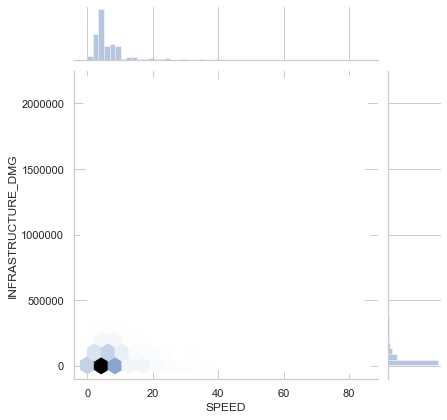

In [90]:
ax = sns.jointplot(x='SPEED', y='INFRASTRUCTURE_DMG', data=df, kind='hex', gridsize=20)
plt.savefig(r"Images/Multi_Train/JOINTPLOT_SPEED_INFRASTRUCTURE_DMG.png")

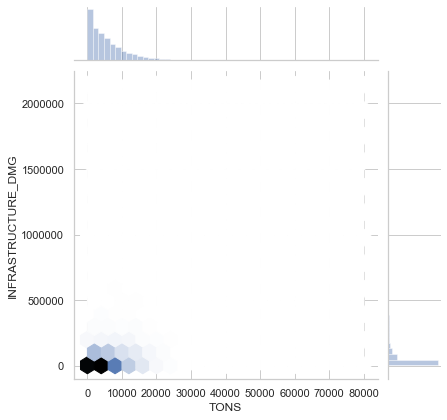

In [91]:
ax = sns.jointplot(x='TONS', y='INFRASTRUCTURE_DMG', data=df, kind='hex', gridsize=20)
plt.savefig(r"Images/Multi_Train/JOINTPLOT_TONS_INFRASTRUCTURE_DMG.png")




### Scattermatrix und Korrelationen der Daten <a class="anchor" id="correlations"></a>
Jahr, Monat, Anzahl der beladenen Frachtwagons und Personenwagons, Gewicht, Temperatur, Geschwindigkeit und Unfallkosten

In [92]:
"""
scattermatrix = scatter_matrix(df[['INFRASTRUCTURE_DMG', 'EQPDMG', 'TRKDMG', 'YEAR4', 'MONTH', 'LOCOMOTIVES1', 'LOADF1', 'LOADP1', 'EMPTYF1', 'EMPTYP1','LOCOMOTIVES2', 'LOADF2', 'EMPTYF2', 'TONS', 'SPEED']], diagonal='kde', figsize=(18, 18))
n = len(df[['INFRASTRUCTURE_DMG', 'EQPDMG', 'TRKDMG', 'YEAR4', 'MONTH', 'LOCOMOTIVES1', 'LOADF1', 'LOADP1', 'EMPTYF1', 'EMPTYP1','LOCOMOTIVES2', 'LOADF2', 'EMPTYF2', 'TONS', 'SPEED']].columns)
for x in range(n):
    for y in range(n):
        # to get the axis of subplots
        ax = scattermatrix[x, y]
        # to make x axis name vertical  
        ax.xaxis.label.set_rotation(-90)
        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 50
plt.savefig(r"Images/Multi_Train/scatterALL.png")
"""

'\nscattermatrix = scatter_matrix(df[[\'INFRASTRUCTURE_DMG\', \'EQPDMG\', \'TRKDMG\', \'YEAR4\', \'MONTH\', \'LOCOMOTIVES1\', \'LOADF1\', \'LOADP1\', \'EMPTYF1\', \'EMPTYP1\',\'LOCOMOTIVES2\', \'LOADF2\', \'EMPTYF2\', \'TONS\', \'SPEED\']], diagonal=\'kde\', figsize=(18, 18))\nn = len(df[[\'INFRASTRUCTURE_DMG\', \'EQPDMG\', \'TRKDMG\', \'YEAR4\', \'MONTH\', \'LOCOMOTIVES1\', \'LOADF1\', \'LOADP1\', \'EMPTYF1\', \'EMPTYP1\',\'LOCOMOTIVES2\', \'LOADF2\', \'EMPTYF2\', \'TONS\', \'SPEED\']].columns)\nfor x in range(n):\n    for y in range(n):\n        # to get the axis of subplots\n        ax = scattermatrix[x, y]\n        # to make x axis name vertical  \n        ax.xaxis.label.set_rotation(-90)\n        # to make y axis name horizontal \n        ax.yaxis.label.set_rotation(0)\n        # to make sure y axis names are outside the plot area\n        ax.yaxis.labelpad = 50\nplt.savefig(r"Images/Multi_Train/scatterALL.png")\n'

In [93]:
colormap = plt.cm.RdBu
corr = df[['INFRASTRUCTURE_DMG', 'EQPDMG', 'TRKDMG', 'YEAR4', 'MONTH', 'LOCOMOTIVES1', 'LOADF1', 'LOADP1', 'EMPTYF1', 'EMPTYP1','LOCOMOTIVES2', 'LOADF2', 'EMPTYF2', 'TONS', 'TEMP_CLUSTER', 'SPEED', 'ACCCAUSE_LVL1', 'TYPE', 'EQUIPMENT_TYPE', 'TYPTRK', 'VISIBLTY', 'WEATHER', 'STATE', 'SPD_TOO_HIGH', 'ACCTYPE', 'Jahreszeit']].corr()
corr

,INFRASTRUCTURE_DMG,EQPDMG,TRKDMG,YEAR4,MONTH,LOCOMOTIVES1,LOADF1,LOADP1,EMPTYF1,EMPTYP1,LOCOMOTIVES2,LOADF2,EMPTYF2,TONS,SPEED
INFRASTRUCTURE_DMG,1.000000,0.954919,0.569437,0.152582,0.009632,0.210788,0.254566,0.010159,0.128621,0.005085,0.304300,0.383797,0.203634,0.243380,0.338420
EQPDMG,0.954919,1.000000,0.350436,0.134180,0.007828,0.193779,0.232034,0.014749,0.119188,0.009392,0.311687,0.323389,0.173150,0.220540,0.312698
TRKDMG,0.569437,0.350436,1.000000,0.138001,0.000464,0.154927,0.192584,0.001445,0.087839,-0.010333,0.123593,0.367499,0.181595,0.188211,0.207176
YEAR4,0.152582,0.134180,0.138001,1.000000,0.019965,0.025333,0.037547,0.004059,0.044440,-0.012292,-0.015012,-0.032238,0.011310,0.068744,-0.059306
MONTH,0.009632,0.007828,0.000464,0.019965,1.000000,0.006649,-0.001309,-0.010085,0.010240,-0.021299,0.015342,-0.005895,0.009566,0.005641,0.003560
LOCOMOTIVES1,0.210788,0.193779,0.154927,0.025333,0.006649,1.000000,0.418610,-0.027346,0.289043,-0.026995,0.249672,0.137852,0.068207,0.414786,0.182562
LOADF1,0.254566,0.232034,0.192584,0.037547,-0.001309,0.418610,1.000000,-0.031623,0.233091,-0.057586,0.089082,0.367333,0.069317,0.879623,0.177521
LOADP1,0.010159,0.014749,0.001445,0.004059,-0.010085,-0.027346,-0.031623,1.000000,-0.031032,0.136896,-0.000541,-0.019023,-0.024215,-0.019790,0.062121
EMPTYF1,0.128621,0.119188,0.087839,0.044440,0.010240,0.289043,0.233091,-0.031032,1.000000,-0.047775,-0.000297,0.007760,0.365263,0.422477,0.035131
EMPTYP1,0.005085,0.009392,-0.010333,-0.012292,-0.021299,-0.026995,-0.057586,0.136896,-0.047775,1.000000,0.014861,-0.035746,-0.036787,-0.058106,0.003395


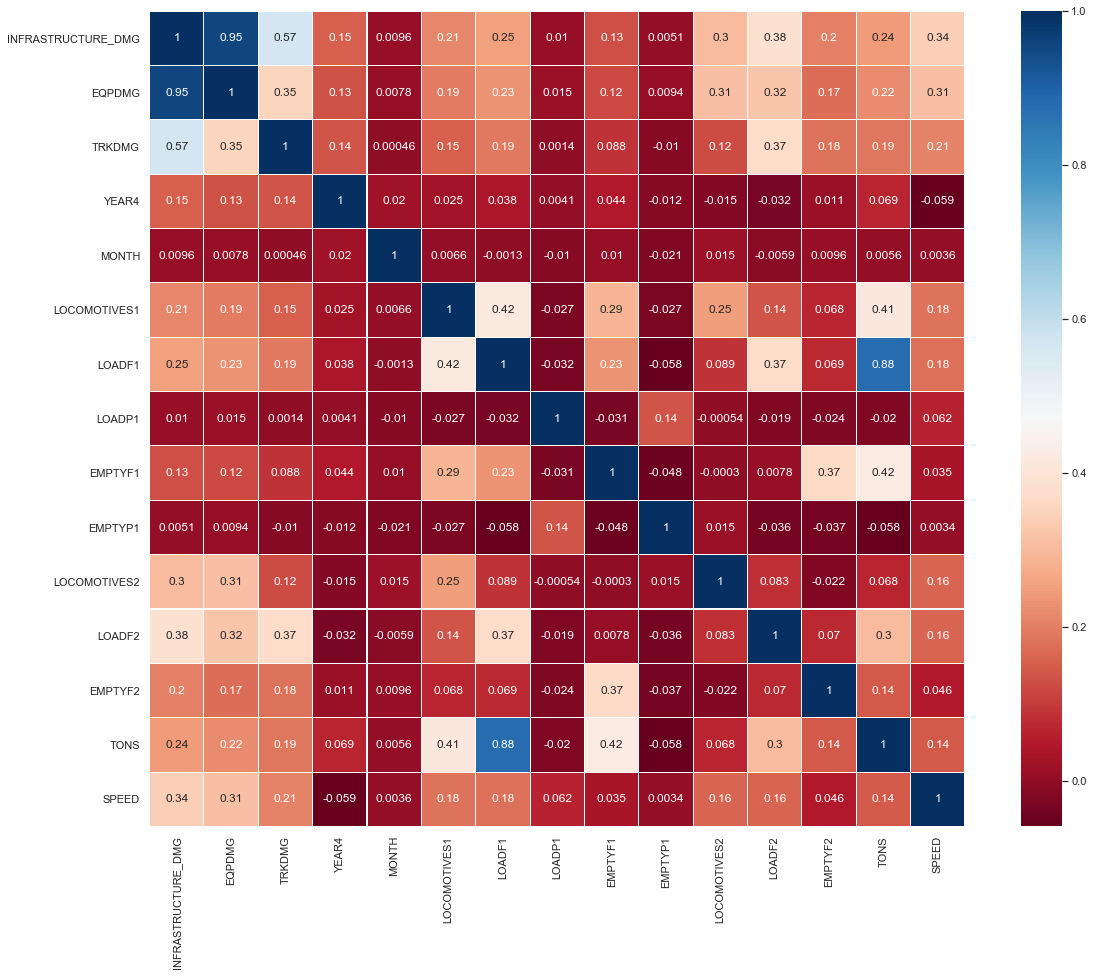

In [94]:
ax=plt.figure(figsize=(20,15)).gca()
ax=sns.heatmap(corr,ax=ax,linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True);
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.savefig(r"Images/Multi_Train/corrALL.png")

In [95]:
corr = df[df['TONS']!=0][['TONS', 'LOADF1', 'LOADP1', 'EMPTYF1', 'EMPTYP1', 'LOADF2', 'EMPTYF2']].corr()
corr

,TONS,LOADF1,LOADP1,EMPTYF1,EMPTYP1,LOADF2,EMPTYF2
TONS,1.000000,0.876947,-0.020965,0.411335,-0.060152,0.292926,0.131659
LOADF1,0.876947,1.000000,-0.032864,0.218795,-0.059513,0.359711,0.056843
LOADP1,-0.020965,-0.032864,1.000000,-0.032073,0.136848,-0.019646,-0.024888
EMPTYF1,0.411335,0.218795,-0.032073,1.000000,-0.049308,-0.003483,0.358010
EMPTYP1,-0.060152,-0.059513,0.136848,-0.049308,1.000000,-0.036683,-0.037771
LOADF2,0.292926,0.359711,-0.019646,-0.003483,-0.036683,1.000000,0.062505
EMPTYF2,0.131659,0.056843,-0.024888,0.358010,-0.037771,0.062505,1.000000





### ANOVA <a class="anchor" id="ANOVA"></a>

In [96]:
anova_df =df[['INFRASTRUCTURE_DMG', 'EQPDMG', 'TRKDMG', 'TEMP_CLUSTER', 'ACCCAUSE_LVL1', 'ACCCAUSE_LVL2', 'ACCIDENT_TYPE', 'EQUIPMENT_TYPE', 'TYPTRK', 'VISIBLTY', 'WEATHER', 'STATE', 'SPD_TOO_HIGH', 'ACCTYPE', 'Jahreszeit']]

In [97]:
anova = anova_df.copy()
anova = anova.dropna

In [98]:
def anova(dmg, cat):
    #print ("ANOVA für INFRASTRUCUTURE_DMG ~ %s :" % (cat))
    mod= ols(dmg + ' ~ ' + cat , data=anova_df).fit()
    anova_table = sm.stats.anova_lm(mod, typ=2)
    esq_sm = anova_table['sum_sq'][0]/(anova_table['sum_sq'][0]+anova_table['sum_sq'][1])
    anova_table['EtaSq'] = [esq_sm, 'NaN']
    anova_table
    pair_t = mod.t_test_pairwise(cat)
    anova_table
    pair_t.result_frame
    return [anova_table, pair_t.result_frame]


#### ANOVA Korrelation Temperatur Cluster und Damage

In [99]:
temp_cluster = anova("INFRASTRUCTURE_DMG","TEMP_CLUSTER")

In [100]:
temp_cluster[0]

,sum_sq,df,F,PR(>F),EtaSq
TEMP_CLUSTER,5.872755e+11,4.0,7.336142,0.000007,0.00369377
Residual,1.584036e+14,7915.0,NaN,NaN,NaN


In [101]:
temp_cluster[1]

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
"Kalt (-30° - 0,01° C)-Heiß (>= 32° C)",-5918.498503,8421.333473,-0.702798,4.822022e-01,-22426.533220,10589.536213,0.923217,False
"Moderat (0° bis 19,99° C)-Heiß (>= 32° C)",-5295.667208,7389.275481,-0.716669,4.735993e-01,-19780.596059,9189.261642,0.923217,False
"Sehr Kalt (-45° - 30,01° C)-Heiß (>= 32° C)",419280.056518,81979.066292,5.114477,3.219924e-07,258579.464770,579980.648266,0.000002,True
"Warm (20° bis 31,99° C)-Heiß (>= 32° C)",-9309.247228,7560.514891,-1.231298,2.182480e-01,-24129.850485,5511.356029,0.771748,False
"Moderat (0° bis 19,99° C)-Kalt (-30° - 0,01° C)",622.831295,5142.523431,0.121114,9.036039e-01,-9457.870960,10703.533550,0.923217,False
"Sehr Kalt (-45° - 30,01° C)-Kalt (-30° - 0,01° C)",425198.555021,81807.160232,5.197571,2.069537e-07,264834.944491,585562.165552,0.000002,True
"Warm (20° bis 31,99° C)-Kalt (-30° - 0,01° C)",-3390.748725,5385.679207,-0.629586,5.289836e-01,-13948.100432,7166.602983,0.923217,False
"Sehr Kalt (-45° - 30,01° C)-Moderat (0° bis 19,99° C)",424575.723726,81707.368088,5.196297,2.083723e-07,264407.732118,584743.715335,0.000002,True
"Warm (20° bis 31,99° C)-Moderat (0° bis 19,99° C)",-4013.580020,3562.032453,-1.126767,2.598752e-01,-10996.103107,2968.943068,0.777912,False
"Warm (20° bis 31,99° C)-Sehr Kalt (-45° - 30,01° C)",-428589.303746,81723.032207,-5.244413,1.608380e-07,-588788.001160,-268390.606332,0.000002,True


#### ANOVA Korrelation Unfallursachen Cluster und Damage

In [102]:
cause = anova("INFRASTRUCTURE_DMG","ACCCAUSE_LVL2")

In [103]:
cause[0]

,sum_sq,df,F,PR(>F),EtaSq
ACCCAUSE_LVL2,7.087262e+11,6.0,5.905225,0.000004,0.00445765
Residual,1.582822e+14,7913.0,NaN,NaN,NaN


In [104]:
cause[1]

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Human Factors-Environmental Conditions,16013.704360,17006.816945,0.941605,0.346424,-17324.143654,49351.552375,0.949818,False
Loading-Environmental Conditions,45062.002381,22888.487383,1.968763,0.049015,194.528583,89929.476179,0.424680,False
Mechanical and Electrical Failures-Environmental Conditions,40600.687175,18508.928128,2.193573,0.028295,4318.304948,76883.069402,0.330915,False
Miscellaneous Causes-Environmental Conditions,10245.371636,17743.396559,0.577419,0.563673,-24536.366749,45027.110021,0.984185,False
Signal and Communication-Environmental Conditions,1372.699402,19760.591728,0.069467,0.944620,-37363.273699,40108.672503,0.991391,False
"Track, Roadbed and Structures-Environmental Conditions",38566.354735,17643.714019,2.185841,0.028856,3980.020425,73152.689044,0.330915,False
Loading-Human Factors,29048.298021,15543.683879,1.868817,0.061685,-1421.423176,59518.019217,0.470964,False
Mechanical and Electrical Failures-Human Factors,24586.982815,7765.544046,3.166164,0.001551,9364.467750,39809.497880,0.026034,True
Miscellaneous Causes-Human Factors,-5768.332724,5705.381258,-1.011034,0.312031,-16952.385206,5415.719758,0.949818,False
Signal and Communication-Human Factors,-14641.004959,10402.126672,-1.407501,0.159318,-35031.917565,5749.907648,0.790258,False


#### ANOVA Korrelation Unfallart und Damage

In [105]:
accidenttype = anova("INFRASTRUCTURE_DMG","ACCIDENT_TYPE")

In [106]:
accidenttype[0]

,sum_sq,df,F,PR(>F),EtaSq
ACCIDENT_TYPE,2.474742e+11,3.0,4.113569,0.006329,0.00155653
Residual,1.587434e+14,7916.0,NaN,NaN,NaN


In [107]:
accidenttype[1]

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Crossing-Collision,26448.332300,25924.987546,1.020187,0.307671,-24371.479971,77268.144572,0.840939,False
Derailment-Collision,11699.776768,3465.188747,3.376375,0.000738,4907.093018,18492.460518,0.004420,True
Fire / Violent Rupture / Explosive Detonation-Collision,-29078.334366,81781.117948,-0.355563,0.722177,-189390.892054,131234.223321,0.945710,False
Derailment-Crossing,-14748.555532,26015.413234,-0.566916,0.570787,-65745.625999,36248.514934,0.945710,False
Fire / Violent Rupture / Explosive Detonation-Crossing,-55526.666667,85749.317464,-0.647546,0.517297,-223617.941859,112564.608526,0.945710,False
Fire / Violent Rupture / Explosive Detonation-Derailment,-40778.111134,81809.828256,-0.498450,0.618181,-201146.948597,119590.726329,0.945710,False


#### ANOVA Korrelation Zugart und Damage

In [108]:
eqtype = anova("INFRASTRUCTURE_DMG","EQUIPMENT_TYPE")

In [109]:
eqtype[0]

,sum_sq,df,F,PR(>F),EtaSq
EQUIPMENT_TYPE,1.830637e+13,90.0,11.319302,3.423024e-146,0.115141
Residual,1.406845e+14,7829.0,NaN,NaN,NaN


In [110]:
eqtype[1]

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
"Commuter Train, Locomotive, NaN-Commuter Train, Commuter Train",178197.000000,189576.717478,0.939973,0.347260,-193423.991079,549817.991079,1.0,False
"Commuter Train, NaN-Commuter Train, Commuter Train",-53351.333333,154788.741644,-0.344672,0.730350,-356778.601950,250075.935284,1.0,False
"Commuter Train, Yard/Switching-Commuter Train, Commuter Train",-61679.000000,189576.717478,-0.325351,0.744924,-433299.991079,309941.991079,1.0,False
"Cut of Cars, Cut of Cars-Commuter Train, Commuter Train",-73449.945946,134503.095006,-0.546084,0.585024,-337111.930047,190212.038155,1.0,False
"Cut of Cars, Cut of Cars, Cut of Cars-Commuter Train, Commuter Train",-79436.666667,154788.741644,-0.513194,0.607830,-382863.935284,223990.601950,1.0,False
...,...,...,...,...,...,...,...,...
"Yard/Switching, Yard/Switching-Work Train, Yard/Switching",-16733.728934,38869.428927,-0.430511,0.666836,-92928.189377,59460.731508,1.0,False
"Yard/Switching, Yard/Switching, Yard/Switching-Work Train, Yard/Switching",-6479.416667,102383.129036,-0.063286,0.949540,-207177.690106,194218.856772,1.0,False
"Yard/Switching, Yard/Switching-Yard/Switching, NaN",-3935.412268,42547.936929,-0.092494,0.926308,-87340.730706,79469.906171,1.0,False
"Yard/Switching, Yard/Switching, Yard/Switching-Yard/Switching, NaN",6318.900000,103835.444540,0.060855,0.951476,-197226.299656,209864.099656,1.0,False


#### ANOVA Korrelation Sichtbarkeit und Damage

In [111]:
vis = anova("INFRASTRUCTURE_DMG","VISIBLTY")

In [112]:
vis[0]

,sum_sq,df,F,PR(>F),EtaSq
VISIBLTY,4.335354e+10,3.0,0.719706,0.540077,0.000272679
Residual,1.589475e+14,7916.0,NaN,NaN,NaN


In [113]:
vis[1]

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Dawn-Dark,4905.783131,8289.655981,0.591796,0.554004,-11344.128658,21155.694919,0.881820,False
Day-Dark,-3733.248410,3338.542663,-1.118227,0.263504,-10277.672437,2811.175616,0.840404,False
Dusk-Dark,-4951.484403,7502.083907,-0.660015,0.509264,-19657.547236,9754.578430,0.881820,False
Day-Dawn,-8639.031541,8289.282797,-1.042193,0.297354,-24888.211790,7610.148709,0.840404,False
Dusk-Dawn,-9857.267534,10669.939321,-0.923835,0.355600,-30773.162375,11058.627307,0.840404,False
Dusk-Day,-1218.235993,7501.671544,-0.162395,0.870999,-15923.490486,13487.018500,0.881820,False


#### ANOVA Korrelation Wetter und Damage

In [114]:
weather = anova("INFRASTRUCTURE_DMG","WEATHER")

In [115]:
weather[0]

,sum_sq,df,F,PR(>F),EtaSq
WEATHER,4.079837e+11,5.0,4.072044,0.00108,0.00256608
Residual,1.585829e+14,7914.0,NaN,NaN,NaN


In [116]:
weather[1]

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Cloudy-Clear,-4821.631722,3789.497159,-1.272367,0.203280,-12250.045770,2606.782326,0.896948,False
Fog-Clear,51432.788591,12667.782018,4.060126,0.000050,26600.594253,76264.982928,0.000644,True
Rain-Clear,-6853.248355,6068.546543,-1.129306,0.258803,-18749.200377,5042.703667,0.932484,False
Sleet-Clear,-3153.887880,34389.615748,-0.091710,0.926930,-70566.606242,64258.830483,0.999997,False
Snow-Clear,-4802.783352,12168.974090,-0.394674,0.693094,-28657.182572,19051.615869,0.999921,False
Fog-Cloudy,56254.420313,12922.291373,4.353285,0.000014,30923.320503,81585.520122,0.000204,True
Rain-Cloudy,-2031.616633,6583.325164,-0.308600,0.757634,-14936.670544,10873.437277,0.999951,False
Sleet-Cloudy,1667.743842,34484.178755,0.048363,0.961429,-65930.342957,69265.830641,0.999997,False
Snow-Cloudy,18.848370,12433.697901,0.001516,0.998791,-24354.479349,24392.176089,0.999997,False
Rain-Fog,-58286.036946,13764.177518,-4.234618,0.000023,-85267.455678,-31304.618214,0.000324,True


#### ANOVA Korrelation zu hoher Geschwindigkeit und Damage

In [117]:
spd = anova("INFRASTRUCTURE_DMG","SPD_TOO_HIGH")

In [118]:
spd[0]

,sum_sq,df,F,PR(>F),EtaSq
SPD_TOO_HIGH,7.993239e+11,1.0,40.008753,2.665525e-10,0.00502748
Residual,1.581916e+14,7918.0,NaN,NaN,NaN


In [119]:
spd[1]

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
True-False,55461.13581,8768.216259,6.325247,2.665525e-10,38273.120338,72649.151282,2.665524e-10,True


#### ANOVA Korrelation Streckenart und Damage

In [120]:
typtrk = anova("INFRASTRUCTURE_DMG","TYPTRK")

In [121]:
typtrk[0]

,sum_sq,df,F,PR(>F),EtaSq
TYPTRK,1.211488e+13,3.0,217.647143,1.129833e-135,0.0761986
Residual,1.468760e+14,7916.0,NaN,NaN,NaN


In [122]:
typtrk[1]

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Main-Industry,99259.430825,7491.208637,13.250122,1.188584e-39,84574.686389,113944.175261,0.000000e+00,True
Siding-Industry,45099.689732,11146.644294,4.046033,5.258825e-05,23249.327434,66950.052031,1.051737e-04,True
Yard-Industry,-7156.208152,6671.994614,-1.072574,2.834950e-01,-20235.077067,5922.660763,2.834950e-01,False
Siding-Main,-54159.741093,9875.935391,-5.484011,4.286067e-08,-73519.178843,-34800.303342,1.285820e-07,True
Yard-Main,-106415.638977,4219.233694,-25.221556,4.494983e-135,-114686.449671,-98144.828283,0.000000e+00,True
Yard-Siding,-52255.897884,9269.919370,-5.637147,1.788313e-08,-70427.384421,-34084.411347,7.153252e-08,True


#### ANOVA Korrelation Signifikanzlevel und Damage

In [123]:
acctype = anova("INFRASTRUCTURE_DMG","ACCTYPE")

In [124]:
acctype[0]

,sum_sq,df,F,PR(>F),EtaSq
ACCTYPE,4.234453e+13,1.0,2874.363145,0.0,0.266333
Residual,1.166464e+14,7918.0,NaN,NaN,NaN


In [125]:
acctype[1]

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Significant-Not Significant,214500.118137,4000.890983,53.613087,0.0,206657.317037,222342.919237,0.0,True


#### ANOVA Korrelation Jahreszeit und Damage

In [126]:
jahreszeit = anova("INFRASTRUCTURE_DMG","Jahreszeit")

In [127]:
jahreszeit[0]

,sum_sq,df,F,PR(>F),EtaSq
Jahreszeit,8.949657e+10,3.0,1.486152,0.216114,0.000562904
Residual,1.589014e+14,7916.0,NaN,NaN,NaN


In [128]:
jahreszeit[1]

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Herbst-Frühling,-5568.640082,4540.579412,-1.226416,0.220079,-14469.373125,3332.092962,0.629999,False
Sommer-Frühling,-1042.766931,4462.333505,-0.233682,0.815238,-9790.117363,7704.583501,0.815238,False
Winter-Frühling,-8350.055348,4573.958641,-1.825564,0.067954,-17316.220485,616.109788,0.344421,False
Sommer-Herbst,4525.873151,4437.950058,1.019812,0.307849,-4173.679295,13225.425596,0.668409,False
Winter-Herbst,-2781.415267,4550.173410,-0.611277,0.541034,-11700.955077,6138.124543,0.789350,False
Winter-Sommer,-7307.288417,4472.095367,-1.633974,0.102304,-16073.774674,1459.197839,0.417030,False


In [129]:
temp_cluster_eqpdmg = anova("EQPDMG","TEMP_CLUSTER")
cause_eqpdmg = anova("EQPDMG","ACCCAUSE_LVL2")
accidenttype_eqpdmg = anova("EQPDMG","ACCIDENT_TYPE")
eqtype_eqpdmg = anova("EQPDMG","EQUIPMENT_TYPE")
vis_eqpdmg = anova("EQPDMG","VISIBLTY")
weather_eqpdmg = anova("EQPDMG","WEATHER")
spd_eqpdmg = anova("EQPDMG","SPD_TOO_HIGH")
typtrk_eqpdmg = anova("EQPDMG","TYPTRK")
acctype_eqpdmg = anova("EQPDMG","ACCTYPE")
jahreszeit_eqpdmg = anova("EQPDMG","Jahreszeit")

In [130]:
temp_cluster_trkdmg = anova("TRKDMG","TEMP_CLUSTER")
cause_trkdmg = anova("TRKDMG","ACCCAUSE_LVL2")
accidenttype_trkdmg = anova("TRKDMG","ACCIDENT_TYPE")
eqtype_trkdmg = anova("TRKDMG","EQUIPMENT_TYPE")
vis_trkdmg = anova("TRKDMG","VISIBLTY")
weather_trkdmg = anova("TRKDMG","WEATHER")
spd_trkdmg = anova("TRKDMG","SPD_TOO_HIGH")
typtrk_trkdmg = anova("TRKDMG","TYPTRK")
acctype_trkdmg = anova("TRKDMG","ACCTYPE")
jahreszeit_trkdmg = anova("TRKDMG","Jahreszeit")

In [131]:
compare_anova = [
                                [
                                    temp_cluster[0]["EtaSq"]["TEMP_CLUSTER"],
                                    cause[0]["EtaSq"]["ACCCAUSE_LVL2"],
                                    accidenttype[0]["EtaSq"]["ACCIDENT_TYPE"],
                                    eqtype[0]["EtaSq"]["EQUIPMENT_TYPE"],
                                    vis[0]["EtaSq"]["VISIBLTY"],
                                    weather[0]["EtaSq"]["WEATHER"],
                                    spd[0]["EtaSq"]["SPD_TOO_HIGH"],
                                    typtrk[0]["EtaSq"]["TYPTRK"],
                                    acctype[0]["EtaSq"]["ACCTYPE"],
                                    jahreszeit[0]["EtaSq"]["Jahreszeit"]
                                ],
                                [
                                    temp_cluster_eqpdmg[0]["EtaSq"]["TEMP_CLUSTER"],
                                    cause_eqpdmg[0]["EtaSq"]["ACCCAUSE_LVL2"],
                                    accidenttype_eqpdmg[0]["EtaSq"]["ACCIDENT_TYPE"],
                                    eqtype_eqpdmg[0]["EtaSq"]["EQUIPMENT_TYPE"],
                                    vis_eqpdmg[0]["EtaSq"]["VISIBLTY"],
                                    weather_eqpdmg[0]["EtaSq"]["WEATHER"],
                                    spd_eqpdmg[0]["EtaSq"]["SPD_TOO_HIGH"],
                                    typtrk_eqpdmg[0]["EtaSq"]["TYPTRK"],
                                    acctype_eqpdmg[0]["EtaSq"]["ACCTYPE"],
                                    jahreszeit_eqpdmg[0]["EtaSq"]["Jahreszeit"]
                                ],
                                [
                                    temp_cluster_trkdmg[0]["EtaSq"]["TEMP_CLUSTER"],
                                    cause_trkdmg[0]["EtaSq"]["ACCCAUSE_LVL2"],
                                    accidenttype_trkdmg[0]["EtaSq"]["ACCIDENT_TYPE"],
                                    eqtype_trkdmg[0]["EtaSq"]["EQUIPMENT_TYPE"],
                                    vis_trkdmg[0]["EtaSq"]["VISIBLTY"],
                                    weather_trkdmg[0]["EtaSq"]["WEATHER"],
                                    spd_trkdmg[0]["EtaSq"]["SPD_TOO_HIGH"],
                                    typtrk_trkdmg[0]["EtaSq"]["TYPTRK"],
                                    acctype_trkdmg[0]["EtaSq"]["ACCTYPE"],
                                    jahreszeit_trkdmg[0]["EtaSq"]["Jahreszeit"]
                                ]
                            ]
pd.DataFrame(compare_anova,columns=["Temperatur", "Ursache","Unfallart", "Zugart", "Sichtbarkeit", "Wetter", "Zug zu schnell?", "Streckenart", "Siginifikanz des Unfalls", "Jahreszeit"], index=["Infrastrukturschaden", "Materialschaden", "Streckenschaden"]).style.format("{:.1g}")

,Temperatur,Ursache,Unfallart,Zugart,Sichtbarkeit,Wetter,Zug zu schnell?,Streckenart,Siginifikanz des Unfalls,Jahreszeit
Infrastrukturschaden,0.004,0.004,0.002,0.1,0.0003,0.003,0.005,0.08,0.3,0.0006
Materialschaden,0.003,0.002,0.0002,0.1,0.0003,0.003,0.005,0.07,0.2,0.0004
Streckenschaden,0.002,0.03,0.03,0.06,0.0006,0.0003,0.002,0.02,0.1,0.0004


#### ANOVA Heatmap <a class="anchor" id="ANOVA_HEATMAP"></a>

**Interpretation:** Nach Cohen (1988) bei .01 (kleiner Effekt), .06 (mittlerer Effekt) und .14 (großer Effekt)

[Cohen, J. (1988)](http://www.utstat.toronto.edu/~brunner/oldclass/378f16/readings/CohenPower.pdf). Statistical Power Analysis for the Behavioral Sciences.

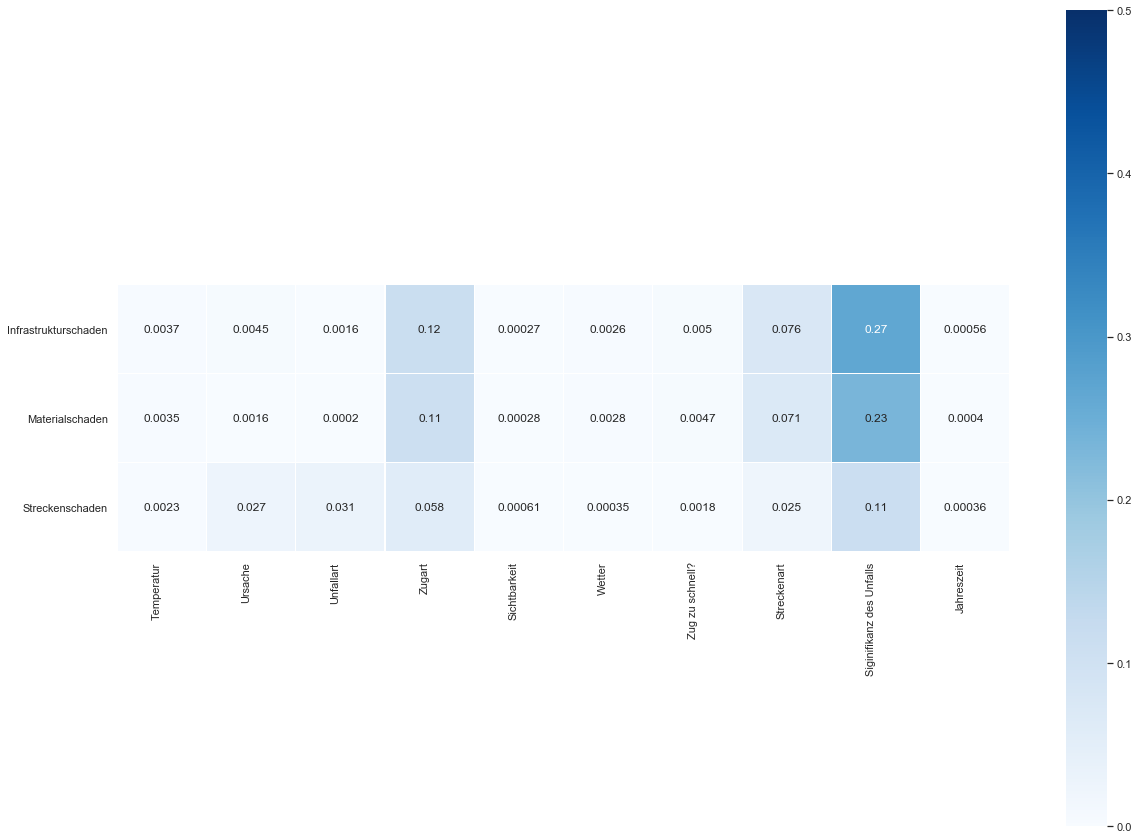

In [132]:
colormap = plt.cm.Blues
ax=plt.figure(figsize=(20,15)).gca()
x_axis_labels = ["Temperatur", "Ursache","Unfallart", "Zugart", "Sichtbarkeit", "Wetter", "Zug zu schnell?", "Streckenart", "Siginifikanz des Unfalls", "Jahreszeit"] # labels for x-axis
y_axis_labels = ["Infrastrukturschaden", "Materialschaden", "Streckenschaden"] # labels for y-axis
ax=sns.heatmap(compare_anova,ax=ax,linewidths=0.1, 
            square=True, cmap=colormap, linecolor='white', annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels, vmin=0, vmax=0.5);
bottom, top = ax.get_ylim()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right', verticalalignment='top')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right')
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.savefig("Images/Multi_Train/ANOVA_Heatmap.png")